## Initial Setup

In [ ]:
import sys
import numpy as np
import netCDF4
from netCDF4 import Dataset
from tempfile import TemporaryFile

## Load Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

gbi_df = pd.read_csv('Greenland_combined_data_Apr_Oct_1979_2021.csv')
gbi_df = gbi_df.drop(columns=['Date'],axis = 1)
#print(gbi_df.info())
gbi = np.array(gbi_df)[:,0]

df1 = pd.read_csv("Greenland_GBi_SM_combined_JJA_daily_1979_2021.csv")
#print(df1.info())

df2 = pd.read_csv("Greenland_GBI_SM_combined_JJA_monthly_1979_2021.csv")
#print(df2.info())

df3 = pd.read_csv("Greenland_SM_regional_JJA_daily_1979_2021.csv")
print(df3.info())

df4 = pd.read_csv("Greenland_SM_regional_JJA_monthly_1979_2021.csv")
#print(df2.info())

daily_data = np.concatenate((np.array(df1)[:3864,:],np.array(df3)[:3864,:]),axis = 1)
monthly_data = np.concatenate((np.array(df2),np.array(df4)),axis = 1)


print(gbi.shape, daily_data.shape, monthly_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sm_NW   3864 non-null   int64
 1   Sm_SW   3864 non-null   int64
 2   Sm_NE   3864 non-null   int64
 3   SM_SE   3864 non-null   int64
dtypes: int64(4)
memory usage: 120.9 KB
None
(9141,) (3864, 9) (129, 9)


## Plotting the Trend
Plotting Geopotential, GBI and GBI_daily_mean

In [ ]:
length = len(daily_data)
months = len(monthly_data)

Text(0, 0.5, 'Greenland Surface Melt Extent')

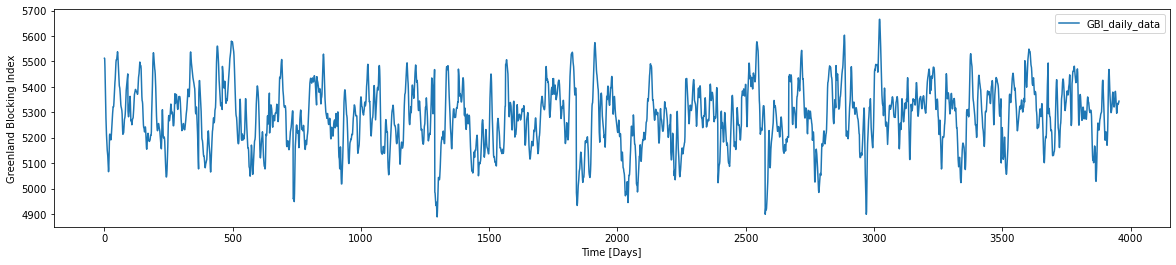

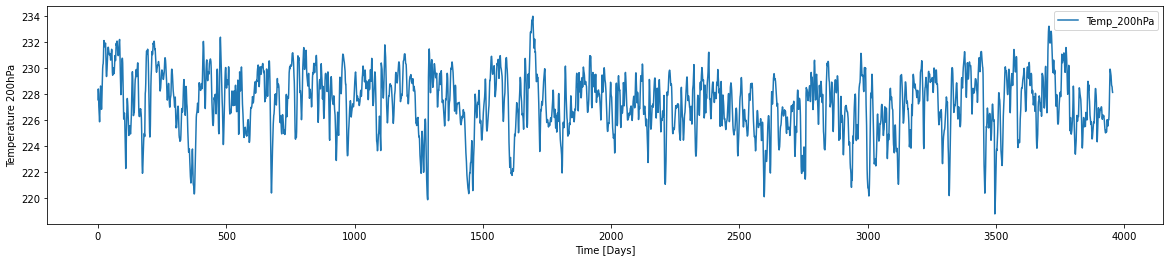

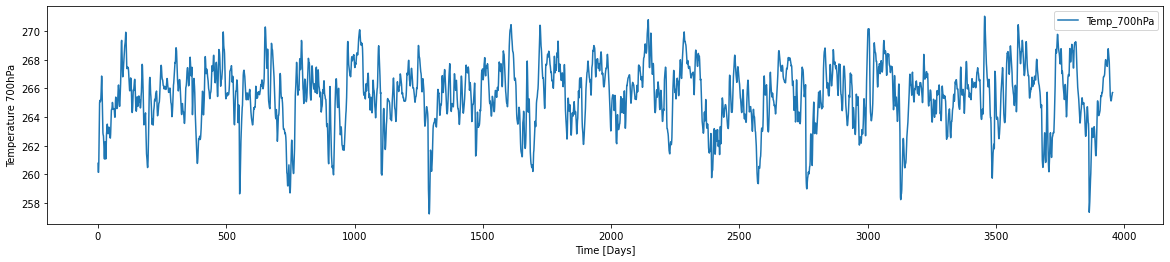

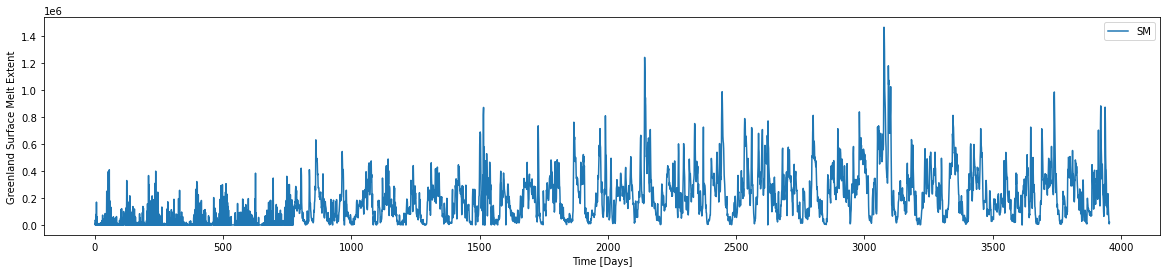

In [ ]:
fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(length),daily_data[:,-2], label = "GBI_daily_data")
ax.legend()
ax.set_xlabel("Time [Days]")
ax.set_ylabel(r"Greenland Blocking Index")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(length),daily_data[:,0], label = "Temp_200hPa")
ax.legend()
ax.set_xlabel("Time [Days]")
ax.set_ylabel(r"Temperature 200hPa")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(length),daily_data[:,2], label = "Temp_700hPa")
ax.legend()
ax.set_xlabel("Time [Days]")
ax.set_ylabel(r"Temperature 700hPa")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(length),daily_data[:,-1], label = "SM")
ax.legend()
ax.set_xlabel("Time [Days]")
ax.set_ylabel(r"Greenland Surface Melt Extent")

### Monthly Time Series Analysis

Text(0, 0.5, 'Greenland Surface Melt Extent')

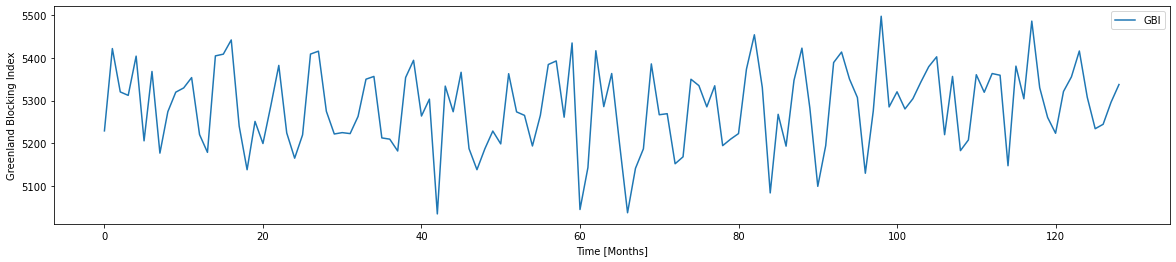

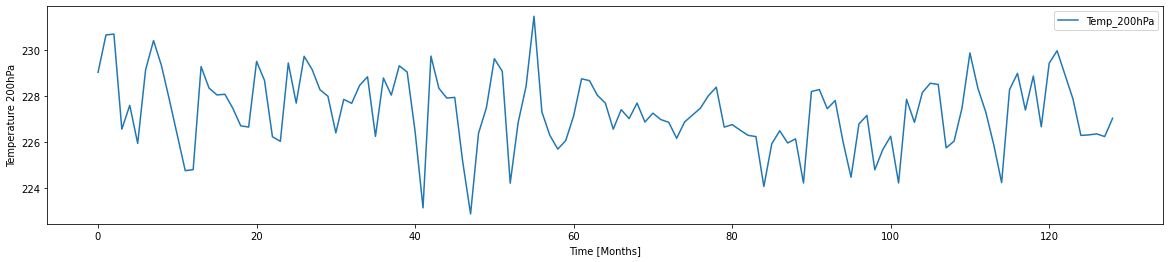

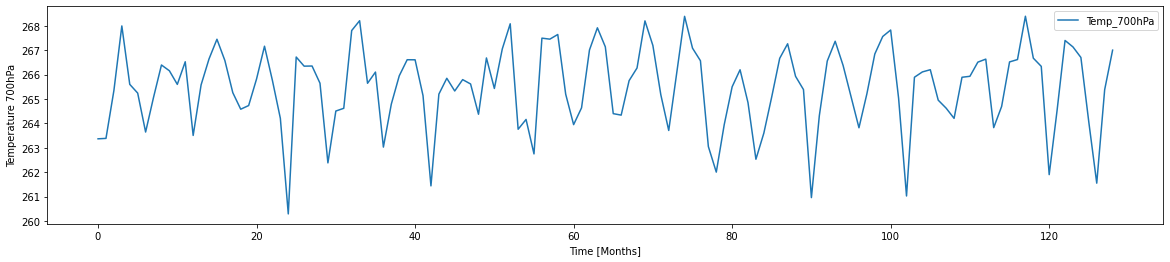

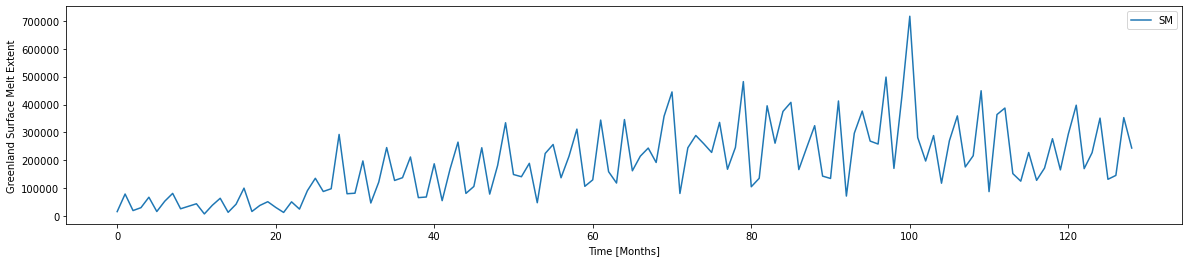

In [ ]:
fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(months),monthly_data[:,-2], label = "GBI")
ax.legend()
ax.set_xlabel("Time [Months]")
ax.set_ylabel(r"Greenland Blocking Index")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(months),monthly_data[:,0], label = "Temp_200hPa")
ax.legend()
ax.set_xlabel("Time [Months]")
ax.set_ylabel(r"Temperature 200hPa")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(months),monthly_data[:,2], label = "Temp_700hPa")
ax.legend()
ax.set_xlabel("Time [Months]")
ax.set_ylabel(r"Temperature 700hPa")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(months),monthly_data[:,-1], label = "SM")
ax.legend()
ax.set_xlabel("Time [Months]")
ax.set_ylabel(r"Greenland Surface Melt Extent")

### Annual Time-series Analysis

In [ ]:
annual_data = np.mean(monthly_data.reshape(43,3,5),axis=1)
years = len(annual_data)
print(annual_data.shape)

(43, 5)


Text(0, 0.5, 'Greenland Surface Melt Extent')

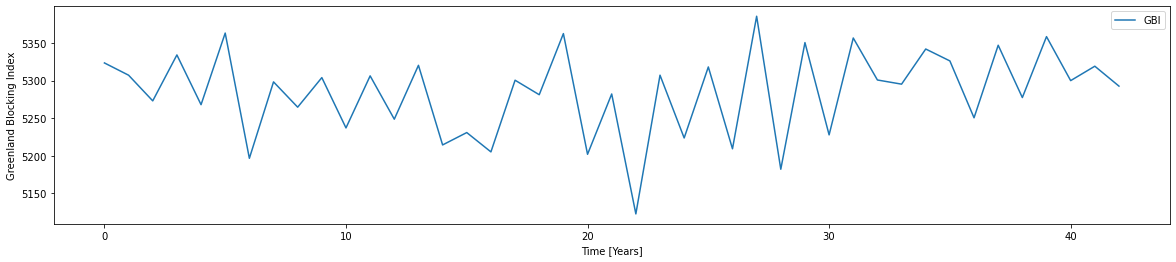

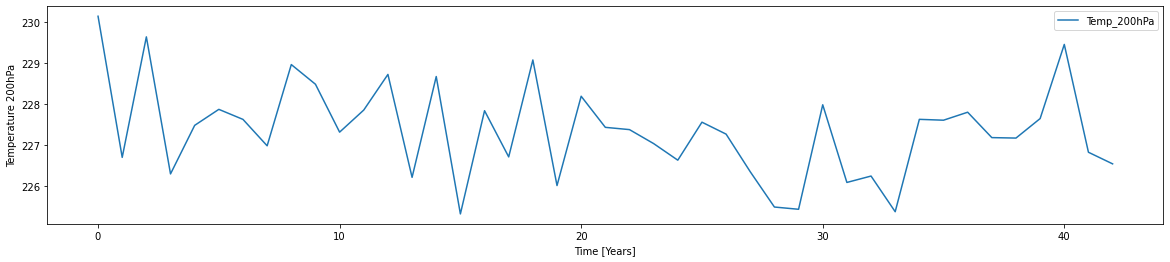

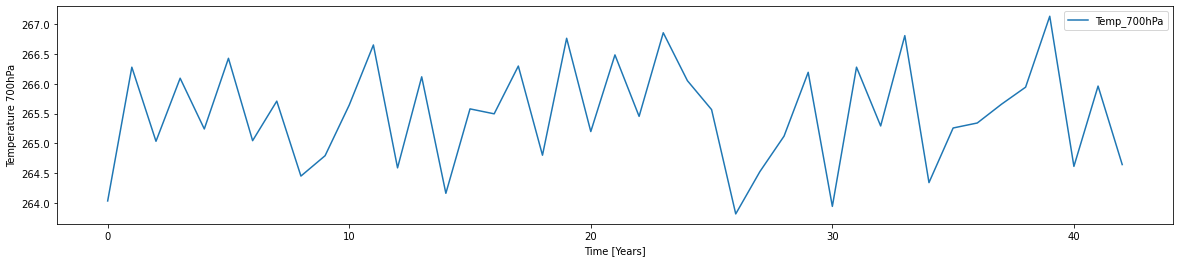

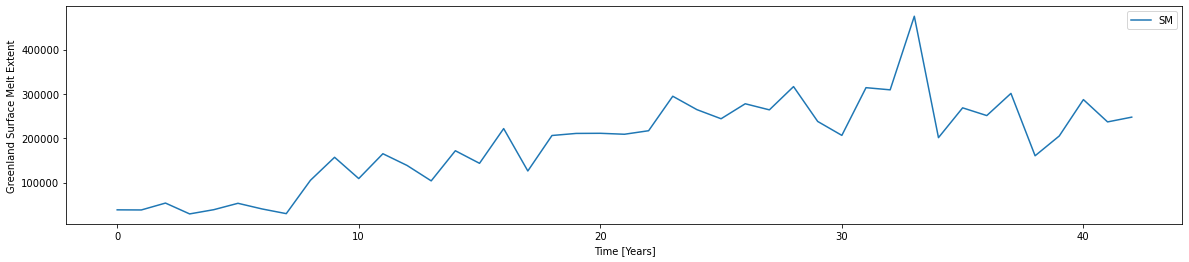

In [ ]:
fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(years),annual_data[:,-2], label = "GBI")
ax.legend()
ax.set_xlabel("Time [Years]")
ax.set_ylabel(r"Greenland Blocking Index")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(years),annual_data[:,0], label = "Temp_200hPa")
ax.legend()
ax.set_xlabel("Time [Years]")
ax.set_ylabel(r"Temperature 200hPa")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(years),annual_data[:,2], label = "Temp_700hPa")
ax.legend()
ax.set_xlabel("Time [Years]")
ax.set_ylabel(r"Temperature 700hPa")

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(years),annual_data[:,-1], label = "SM")
ax.legend()
ax.set_xlabel("Time [Years]")
ax.set_ylabel(r"Greenland Surface Melt Extent")

## Lagged Correlation Analysis

### GBI vs SM Lagged Correlation Daily Data

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal

/home/ubuntu/anaconda3/envs/sea-ice-research/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
df1.columns

Index(['Temp_200hPa', 'Temp_500hPa', 'Temp_700hPa', 'GBI', 'SM'], dtype='object')

In [ ]:
df3.columns

Index(['Sm_NW', 'Sm_SW', 'Sm_NE', 'SM_SE'], dtype='object')

In [ ]:
#Normalize Data - Comment out this cell if not normalizing the data
import pandas as pd
from sklearn import preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(daily_data)
df5 = pd.DataFrame(daily_data)
df5.columns = ['Temp_200hPa', 'Temp_500hPa', 'Temp_700hPa', 'GBI', 'SM', 'Sm_NW', 'Sm_SW', 'Sm_NE', 'SM_SE']
print(df5.head())

df6 = pd.DataFrame(monthly_data)
df6.columns = ['Temp_200hPa', 'Temp_500hPa', 'Temp_700hPa', 'GBI', 'SM', 'Sm_NW', 'Sm_SW', 'Sm_NE', 'SM_SE']
print(df6.head())

   Temp_200hPa  Temp_500hPa  Temp_700hPa          GBI       SM  Sm_NW  Sm_SW  \
0   227.558931   246.932893   260.774839  5512.807445  32500.0    0.0    0.0   
1   228.390383   246.071366   260.151820  5511.505607      0.0    0.0    0.0   
2   228.016316   246.073816   260.150871  5477.944767  14375.0    0.0    0.0   
3   227.063089   246.973543   260.898861  5423.753221      0.0    0.0    0.0   
4   226.601011   248.320919   262.449003  5367.525988  77500.0    0.0    0.0   

   Sm_NE  SM_SE  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0  
   Temp_200hPa  Temp_500hPa  Temp_700hPa          GBI            SM  Sm_NW  \
0   229.035068   249.119120   263.366752  5229.354888  16104.166667    0.0   
1   230.663464   248.593438   263.384092  5421.225071  79173.387097    0.0   
2   230.700478   250.318570   265.347844  5320.145762  19899.193548    0.0   
3   226.566208   253.534115   267.993599  5312.124905  30270.833333    0.0   
4   227.602218   250.

In [ ]:
#Find max lagged correlation in normalized data and GBI (by adding lag to GBI)
max_lag = 31
lagged_correlation = pd.DataFrame.from_dict(
    {x: [df['GBI'].corr(df[x].shift(-t)) for t in range(max_lag)] for x in df.columns})

print(lagged_correlation)

    Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM     Sm_NW  \
0      0.057278     0.303532     0.320617  1.000000 -0.032290  0.059532   
1      0.047382     0.294407     0.311561  0.974906 -0.037570  0.059091   
2      0.036948     0.285284     0.302729  0.926320 -0.042871  0.058519   
3      0.027274     0.275626     0.293864  0.864021 -0.047791  0.058622   
4      0.019157     0.264942     0.284305  0.796441 -0.053007  0.058698   
5      0.012553     0.254033     0.274467  0.729397 -0.056553  0.058209   
6      0.006788     0.244295     0.265494  0.665956 -0.059669  0.057109   
7      0.000831     0.236679     0.258110  0.607052 -0.061085  0.056639   
8     -0.005483     0.231400     0.252519  0.552328 -0.062540  0.057907   
9     -0.010970     0.227517     0.247933  0.501276 -0.062821  0.060501   
10    -0.014800     0.223873     0.243147  0.453703 -0.064913  0.064449   
11    -0.017035     0.219685     0.237564  0.409979 -0.066092  0.069209   
12    -0.017882     0.214

In [ ]:
#Find max lagged correlation in raw data and GBI (by adding lag to GBI)
max_lag = 31
lagged_correlation2 = pd.DataFrame.from_dict(
    {x: [df5['GBI'].corr(df5[x].shift(-t)) for t in range(max_lag)] for x in df5.columns})

print(lagged_correlation2)

    Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM     Sm_NW  \
0      0.057278     0.303532     0.320617  1.000000 -0.032290  0.059532   
1      0.047382     0.294407     0.311561  0.974906 -0.037570  0.059091   
2      0.036948     0.285284     0.302729  0.926320 -0.042871  0.058519   
3      0.027274     0.275626     0.293864  0.864021 -0.047791  0.058622   
4      0.019157     0.264942     0.284305  0.796441 -0.053007  0.058698   
5      0.012553     0.254033     0.274467  0.729397 -0.056553  0.058209   
6      0.006788     0.244295     0.265494  0.665956 -0.059669  0.057109   
7      0.000831     0.236679     0.258110  0.607052 -0.061085  0.056639   
8     -0.005483     0.231400     0.252519  0.552328 -0.062540  0.057907   
9     -0.010970     0.227517     0.247933  0.501276 -0.062821  0.060501   
10    -0.014800     0.223873     0.243147  0.453703 -0.064913  0.064449   
11    -0.017035     0.219685     0.237564  0.409979 -0.066092  0.069209   
12    -0.017882     0.214

In [ ]:
#Find max lagged correlation in monthly data
max_lag = 3
lagged_correlation3 = pd.DataFrame.from_dict(
    {x: [df6['GBI'].corr(df6[x].shift(-t)) for t in range(max_lag)] for x in df6.columns})

print(lagged_correlation3)

   Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM     Sm_NW  \
0     0.086095     0.478634     0.492918  1.000000 -0.028269  0.085021   
1    -0.170162     0.096663     0.102488  0.145156 -0.028848  0.165793   
2    -0.228585    -0.284772    -0.322802 -0.175813  0.143588  0.239199   

      Sm_SW     Sm_NE     SM_SE  
0  0.084193 -0.056784  0.098314  
1  0.140533  0.020950  0.072932  
2  0.015862 -0.182350 -0.023840  


### Pearson correlation in data

             Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM  \
Temp_200hPa     1.000000    -0.374965    -0.353332  0.057278 -0.072809   
Temp_500hPa    -0.374965     1.000000     0.954935  0.303532  0.102567   
Temp_700hPa    -0.353332     0.954935     1.000000  0.320617  0.097719   
GBI             0.057278     0.303532     0.320617  1.000000 -0.032290   
SM             -0.072809     0.102567     0.097719 -0.032290  1.000000   
Sm_NW          -0.126980     0.020385     0.020299  0.059532  0.313811   
Sm_SW          -0.065112     0.080603     0.082118  0.045809  0.094427   
Sm_NE           0.043398     0.004935     0.008311  0.004913 -0.034900   
SM_SE           0.023060    -0.017252    -0.028196  0.020356 -0.017400   

                Sm_NW     Sm_SW     Sm_NE     SM_SE  
Temp_200hPa -0.126980 -0.065112  0.043398  0.023060  
Temp_500hPa  0.020385  0.080603  0.004935 -0.017252  
Temp_700hPa  0.020299  0.082118  0.008311 -0.028196  
GBI          0.059532  0.045809  0.004913  

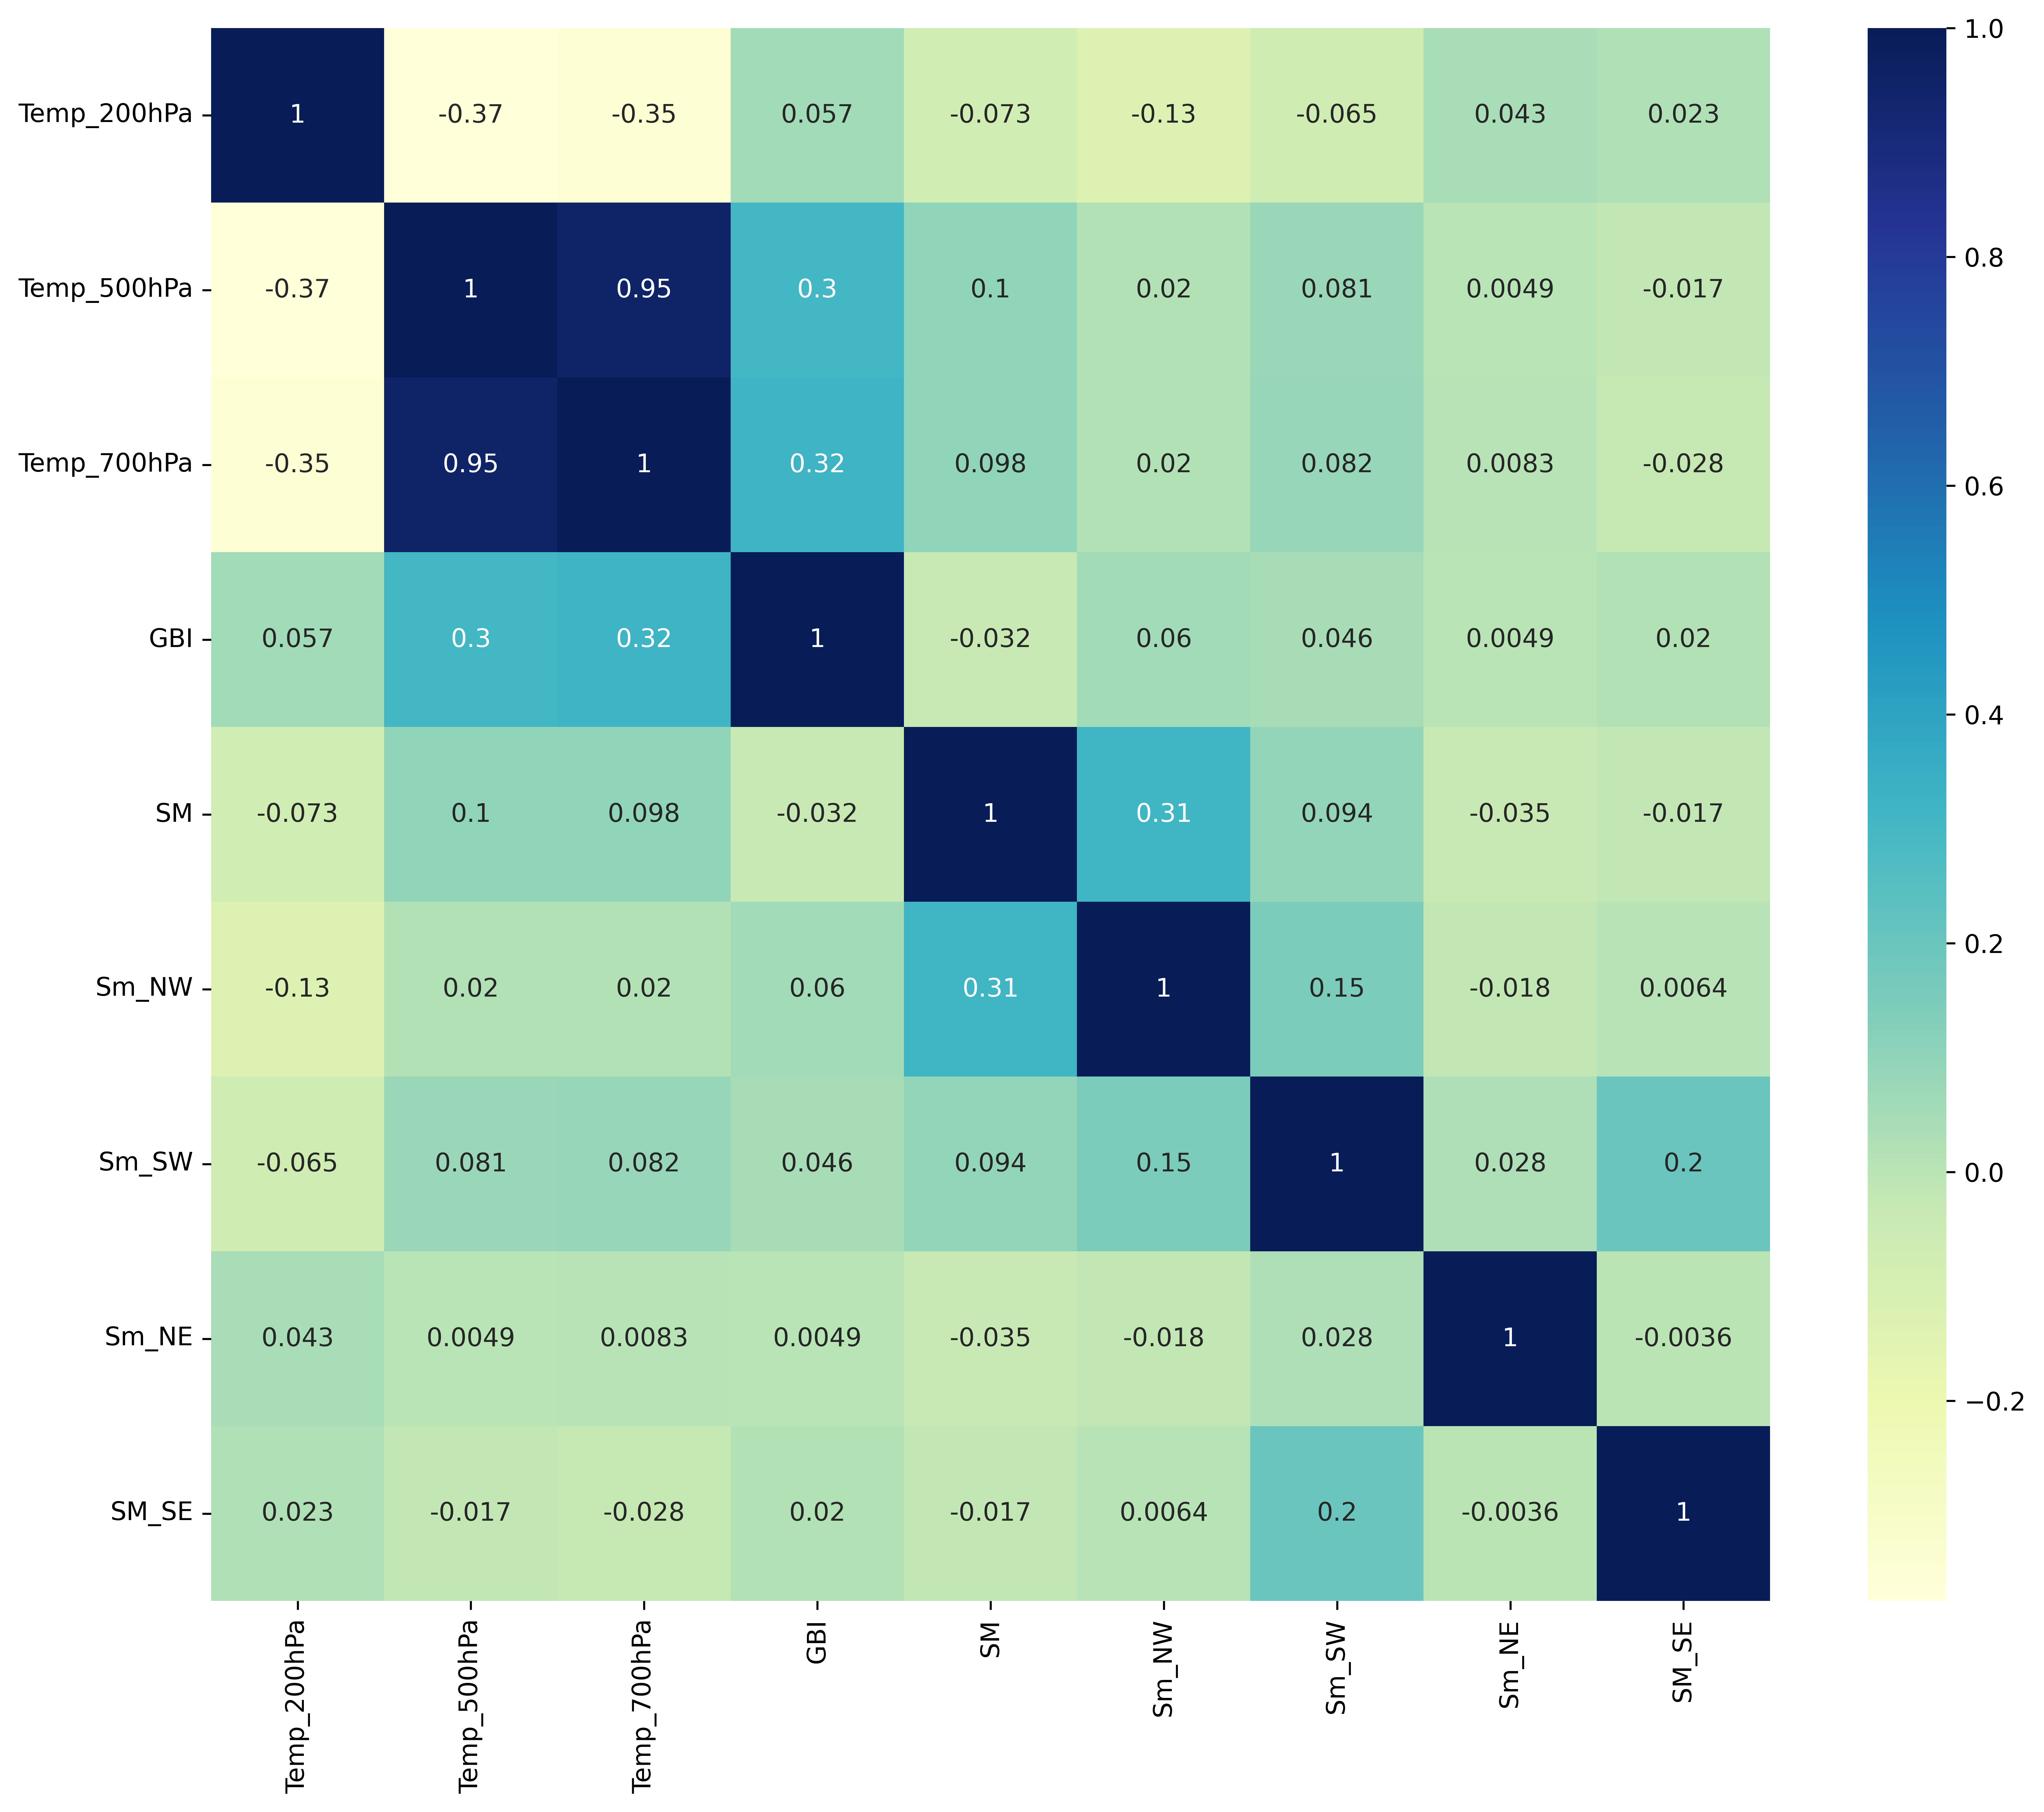

In [ ]:
#Correlation Matrix of the daily dataset

import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10), dpi = 600)
corrMatrix = df5.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.tight_layout()
fig.savefig('Correlation_analysis_daily_JJA_data.png')

             Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM  \
Temp_200hPa     1.000000    -0.107554    -0.114041  0.086095 -0.132954   
Temp_500hPa    -0.107554     1.000000     0.974158  0.478634  0.110390   
Temp_700hPa    -0.114041     0.974158     1.000000  0.492918  0.092876   
GBI             0.086095     0.478634     0.492918  1.000000 -0.028269   
SM             -0.132954     0.110390     0.092876 -0.028269  1.000000   
Sm_NW          -0.214044     0.016099     0.019009  0.085021  0.418923   
Sm_SW          -0.116519     0.156801     0.157759  0.084193  0.137529   
Sm_NE           0.150232     0.034401     0.046721 -0.056784 -0.114282   
SM_SE           0.097982     0.012383    -0.024674  0.098314 -0.023333   

                Sm_NW     Sm_SW     Sm_NE     SM_SE  
Temp_200hPa -0.214044 -0.116519  0.150232  0.097982  
Temp_500hPa  0.016099  0.156801  0.034401  0.012383  
Temp_700hPa  0.019009  0.157759  0.046721 -0.024674  
GBI          0.085021  0.084193 -0.056784  

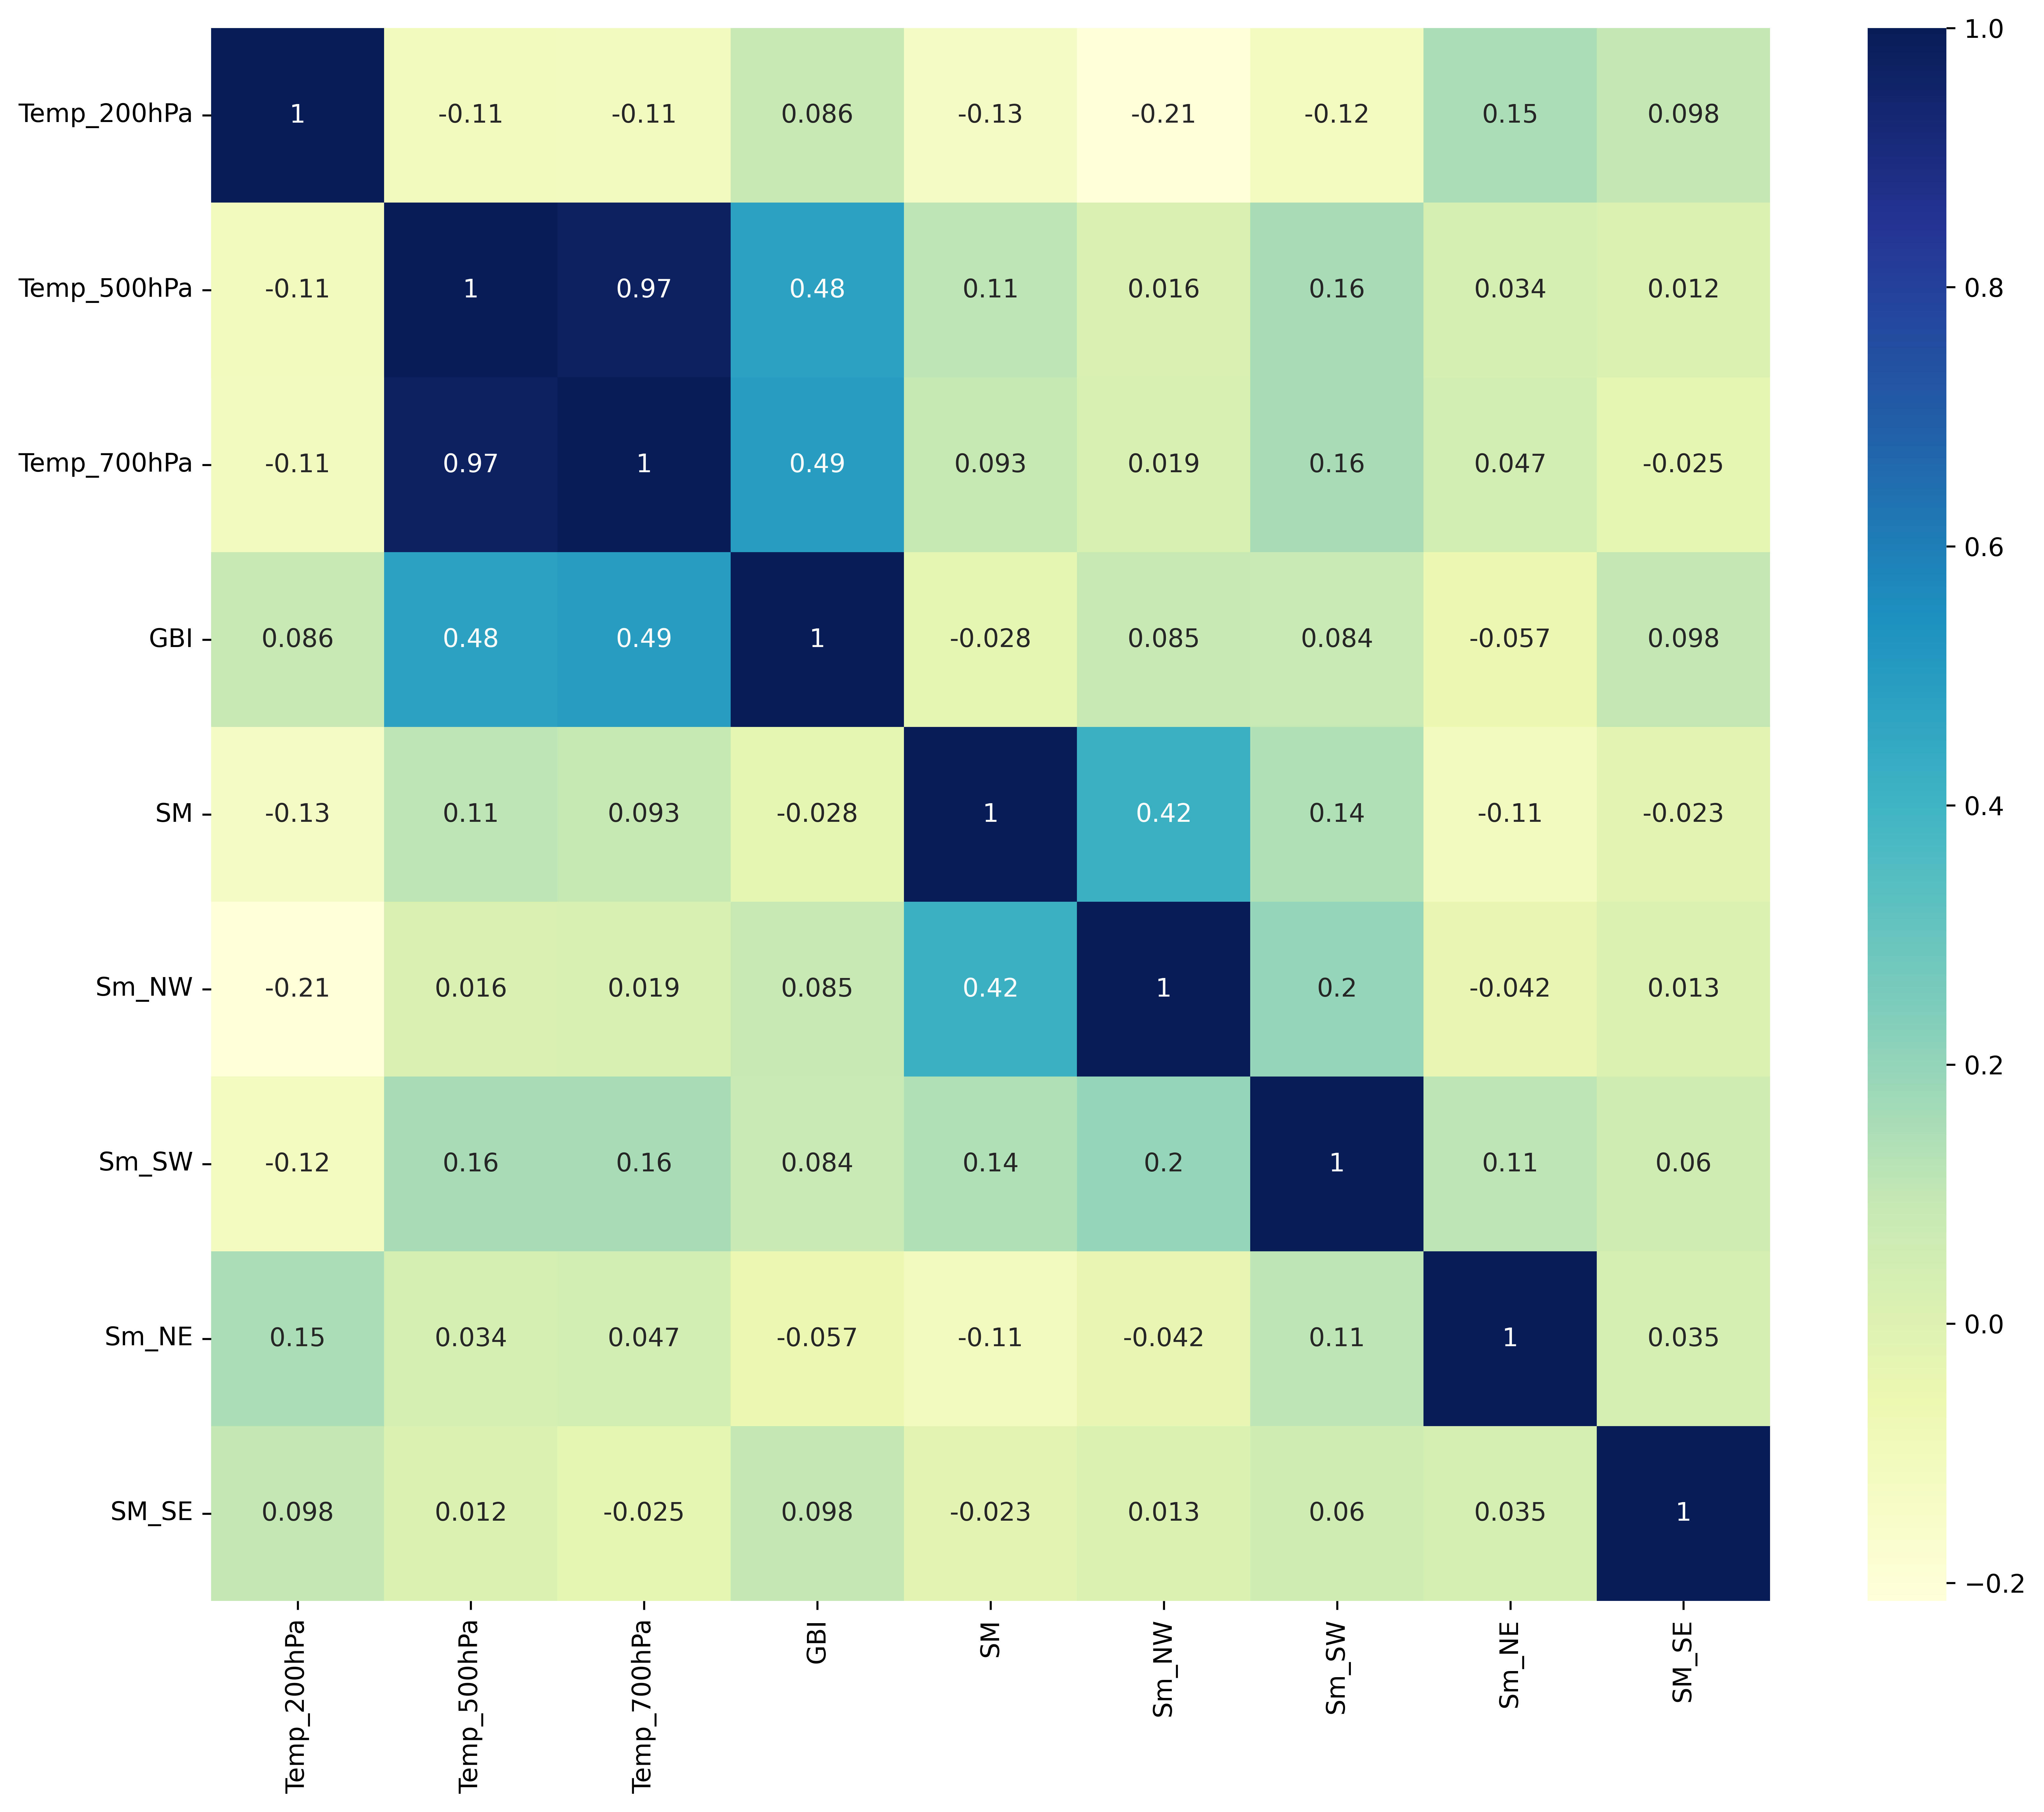

In [ ]:
#Correlation Matrix of the monthly dataset

import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10), dpi = 600)
corrMatrix = df6.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.tight_layout()
fig.savefig('Correlation_analysis_monthly_JJA_data.png')

### GBI vs SM Lagged Correlation Monthly Data

In [ ]:
df = pd.read_csv('Greenland_combined_running_avg_monthly_data_1979_2021.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp_200hPa  305 non-null    float64
 1   Temp_500hPa  305 non-null    float64
 2   Temp_700hPa  305 non-null    float64
 3   GBI          305 non-null    float64
 4   SM           305 non-null    float64
dtypes: float64(5)
memory usage: 12.0 KB
None


In [ ]:
#Find max lagged correlation in monthly data and GBI (by adding lag to GBI)
max_lag = 12
lagged_correlation = pd.DataFrame.from_dict(
    {x: [df[x].corr(df['GBI'].shift(-t)) for t in range(max_lag)] for x in df.columns})

print(lagged_correlation)

    Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM
0      0.027796     0.002890     0.030099  1.000000  0.061363
1      0.042281     0.024396     0.041595  0.684635 -0.018345
2     -0.000523    -0.009593     0.035654  0.439540 -0.082880
3     -0.001780    -0.008527     0.038875  0.186201 -0.058455
4      0.063129     0.056288     0.040821 -0.127567  0.013743
5      0.031287     0.027764     0.018745 -0.428006  0.079405
6     -0.009489    -0.017992     0.006444 -0.591251  0.109449
7     -0.017992    -0.025741     0.001547 -0.697170  0.055069
8     -0.066842    -0.069097    -0.007208 -0.637842 -0.042429
9     -0.052967    -0.050898     0.001907 -0.439944 -0.122933
10    -0.080858    -0.079217     0.004884 -0.222314 -0.114563
11    -0.035414    -0.015294     0.020544  0.076772 -0.022847


             Temp_200hPa  Temp_500hPa  Temp_700hPa       GBI        SM
Temp_200hPa     1.000000     0.888952     0.091298  0.027796  0.028563
Temp_500hPa     0.888952     1.000000     0.134849  0.002890  0.014995
Temp_700hPa     0.091298     0.134849     1.000000  0.030099 -0.078833
GBI             0.027796     0.002890     0.030099  1.000000  0.061363
SM              0.028563     0.014995    -0.078833  0.061363  1.000000


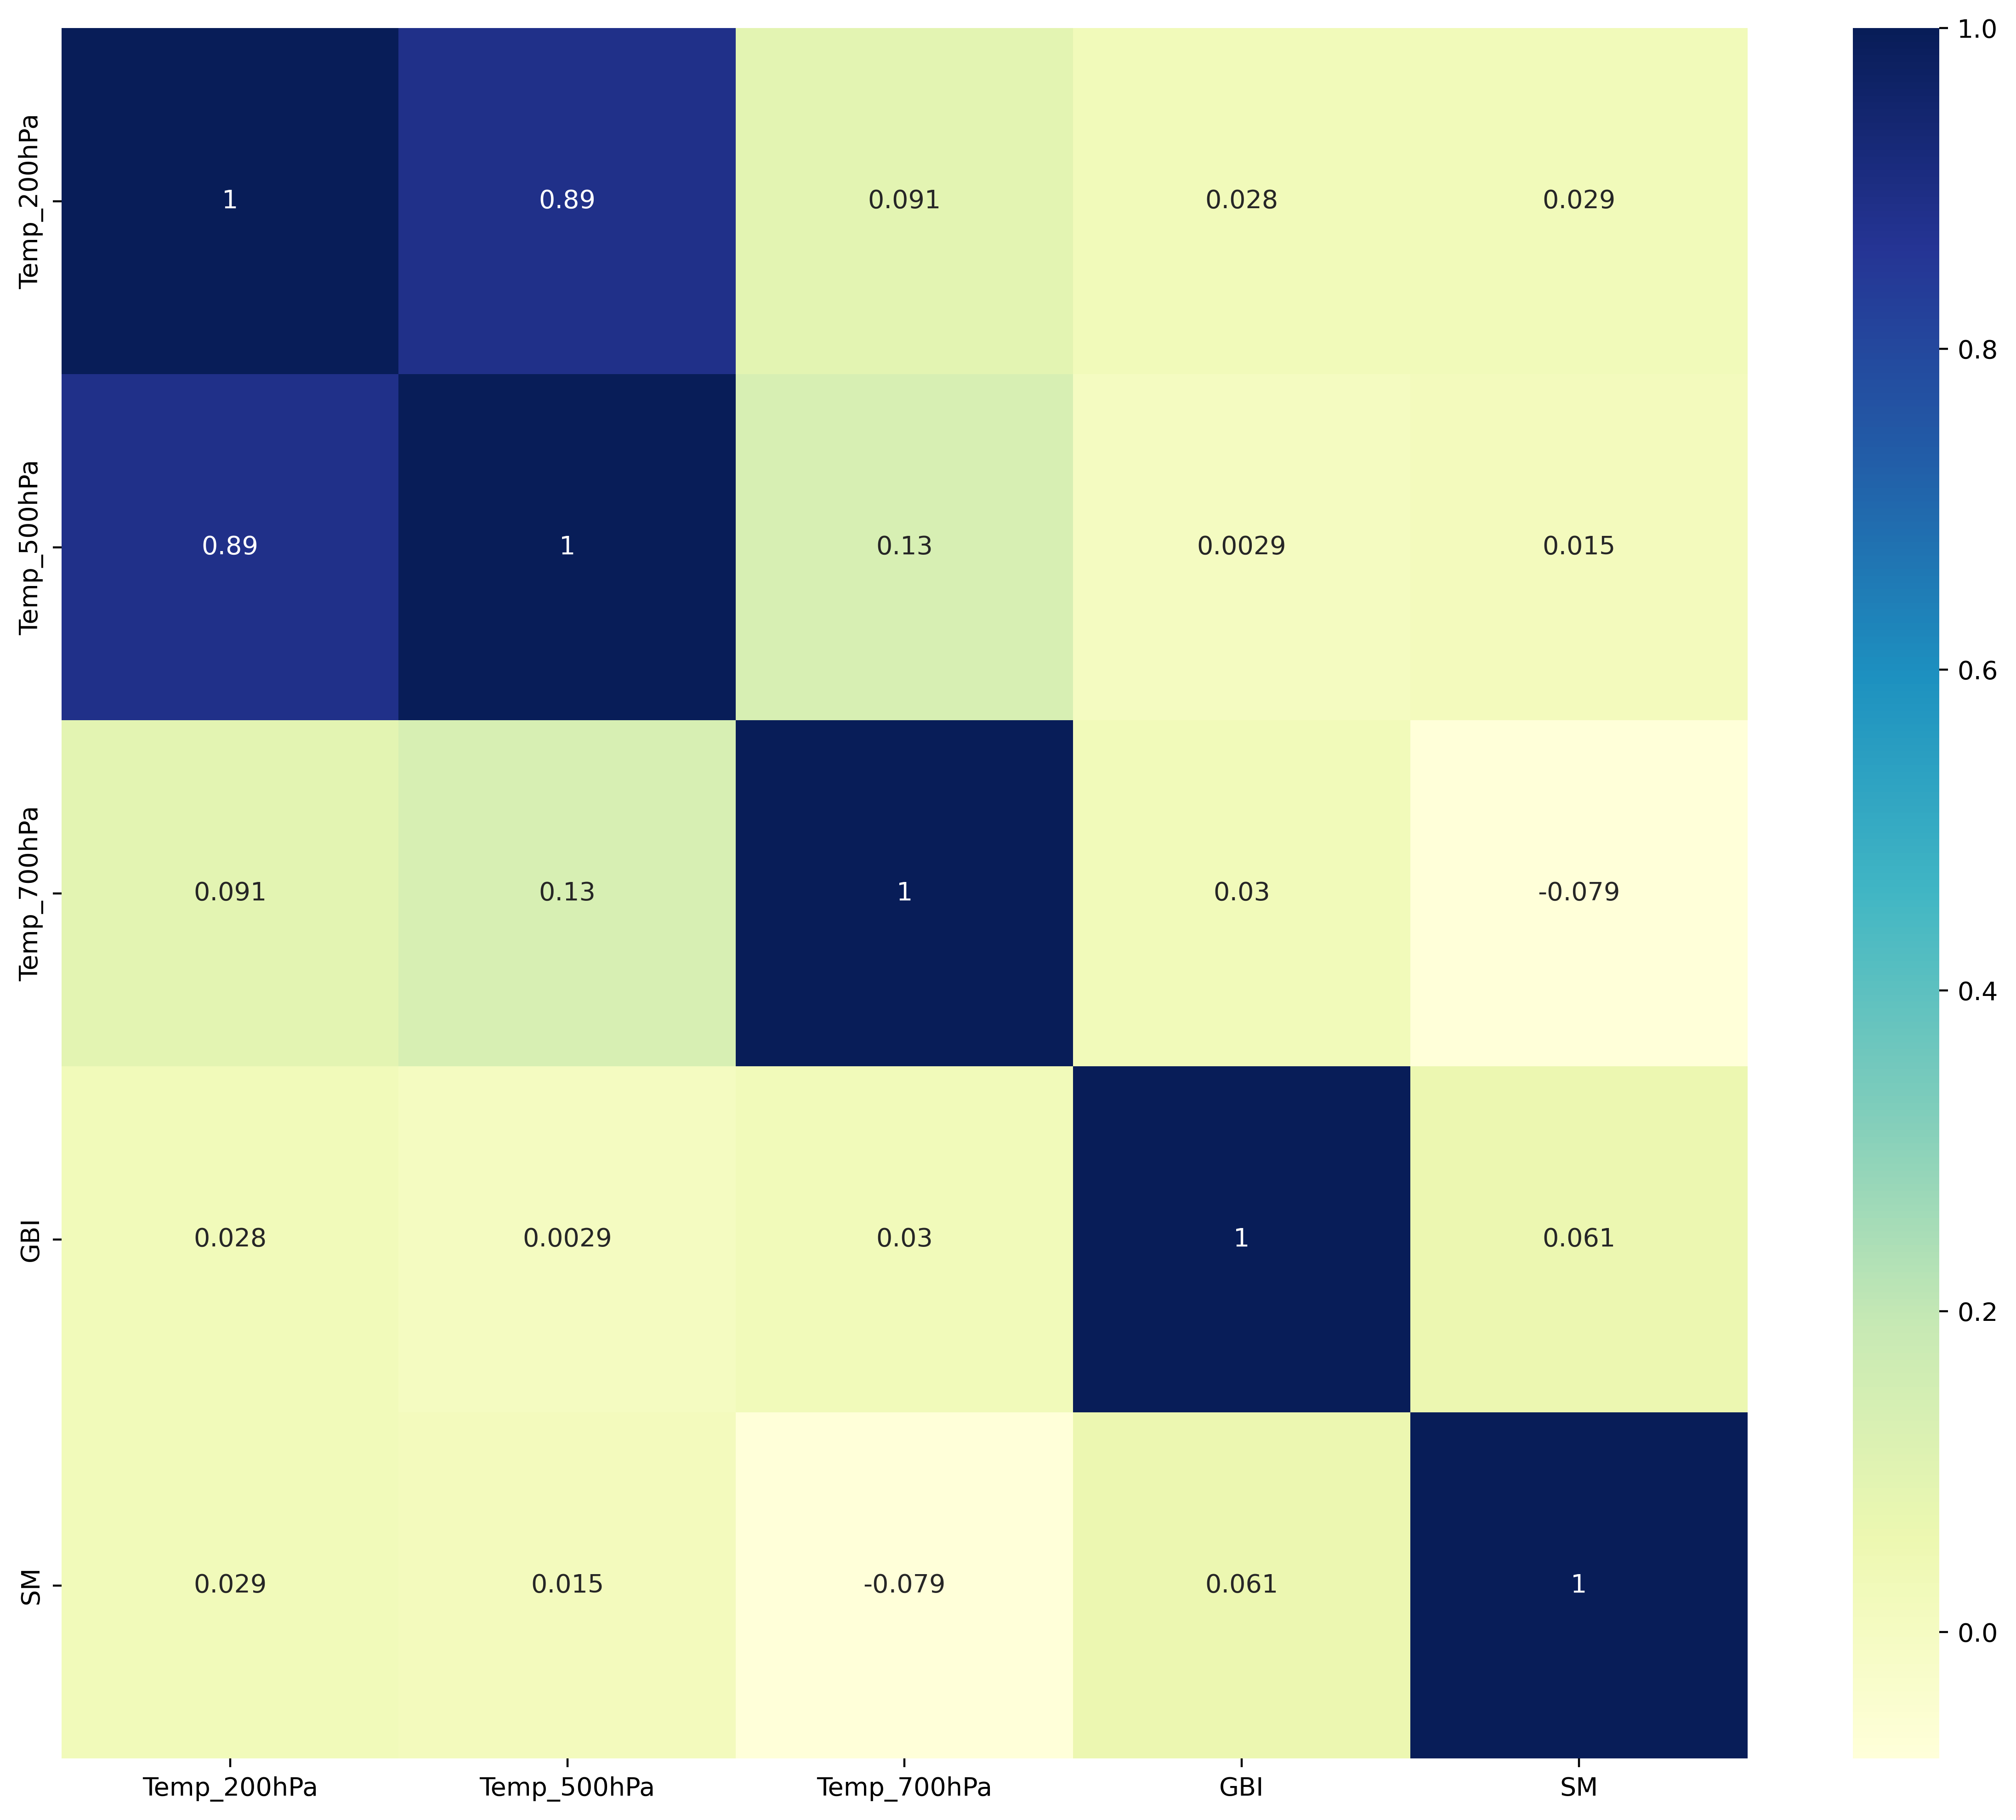

In [ ]:
#Correlation Matrix of the dataset

import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10), dpi = 400)
corrMatrix = df.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.tight_layout()
fig.savefig('Correlation_analysis_monthly_running_avg_data.png')

## Trend Analysis

### Surface Melt daily Trend

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,len(daily_data)+1,1)
Y = daily_data[:,-1]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [68.16119005] x +  55660.33775129469
lr confidence:  0.18312512698941785


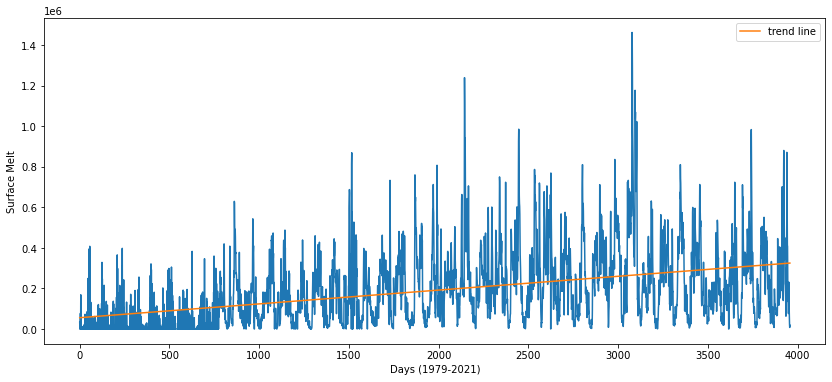

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Days (1979-2021)')
plt.ylabel('Surface Melt')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### Surface Melt Monthly Trend

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#monthly_mean = np.array(df)

X = np.arange(1,len(monthly_data)+1,1)
Y = monthly_data[:,-2]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [0.22091314] x +  5269.82591448886
lr confidence:  0.007445166846817841


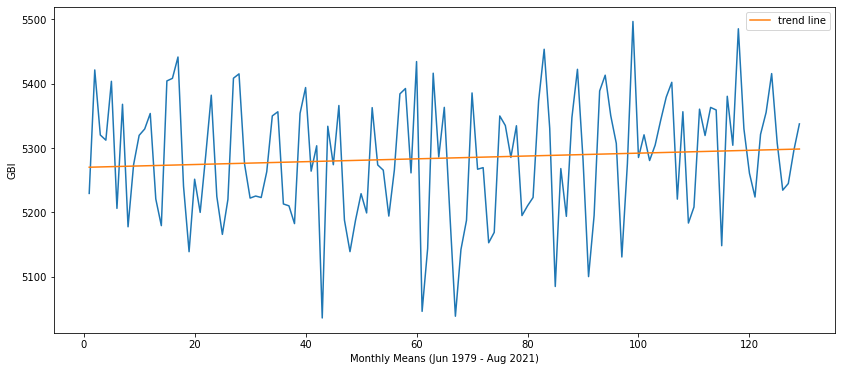

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Monthly Means (Jun 1979 - Aug 2021)')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#monthly_mean = np.array(df)

X = np.arange(1,len(annual_data)+1,1)
Y = annual_data[:,-2]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [6313.38854735] x +  51408.16826230366
lr confidence:  0.6338493310681903


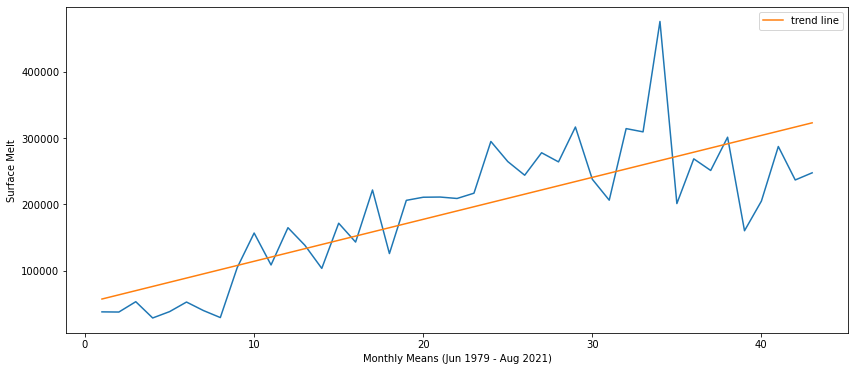

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Monthly Means (Jun 1979 - Aug 2021)')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### GBI 5 day running avg Trend

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,9138,1)
Y = run_avg_data[:,-2]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [0.00096192] x +  5282.66422931513
lr confidence:  0.00028902097014882333


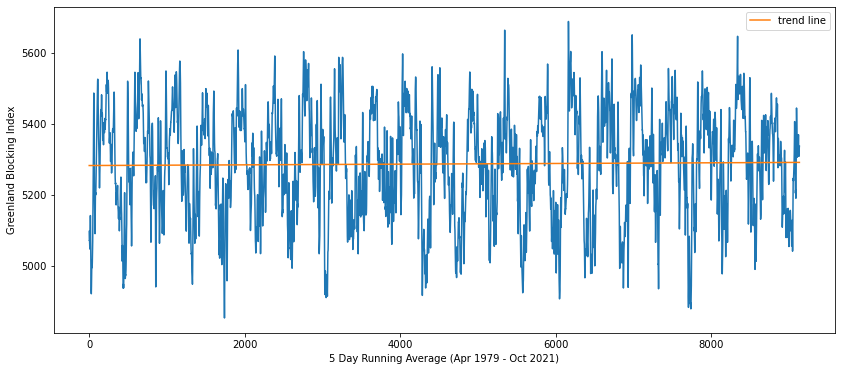

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('5 Day Running Average (Apr 1979 - Oct 2021)')
plt.ylabel('Greenland Blocking Index')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### GBI Monthly Trend

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

monthly_mean = np.array(df)

X = np.arange(1,306,1)
Y = monthly_mean[:,-2]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [0.03017715] x +  5282.512474233541
lr confidence:  0.0004108634272853573


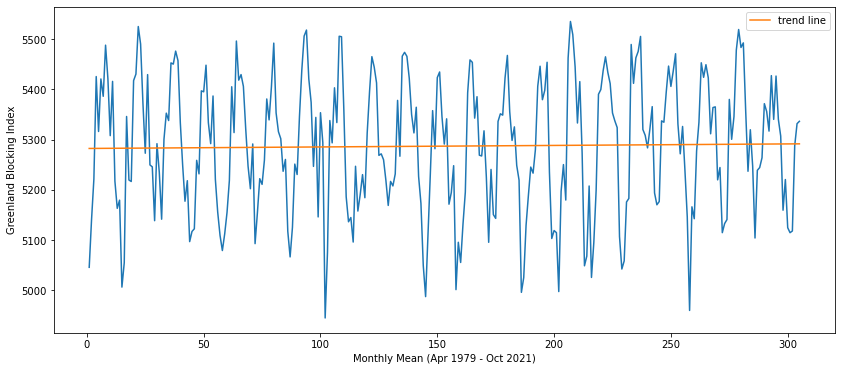

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Monthly Mean (Apr 1979 - Oct 2021)')
plt.ylabel('Greenland Blocking Index')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### Annual Trend Analysis

In [ ]:
9137/210

43.50952380952381

In [ ]:
annual_mean_sm = np.array([np.mean(run_avg_data[i*210:(i*210)+210,-1],axis =0) for i in range(44)])
annual_mean_gbi = np.array([np.mean(run_avg_data[i*210:(i*210)+210,-2],axis =0) for i in range(44)])

In [ ]:
print(annual_mean_sm.shape)

(44,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,45,1)
Y = annual_mean_sm
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [2778.57122471] x +  28092.154220661614
lr confidence:  0.587112209060715


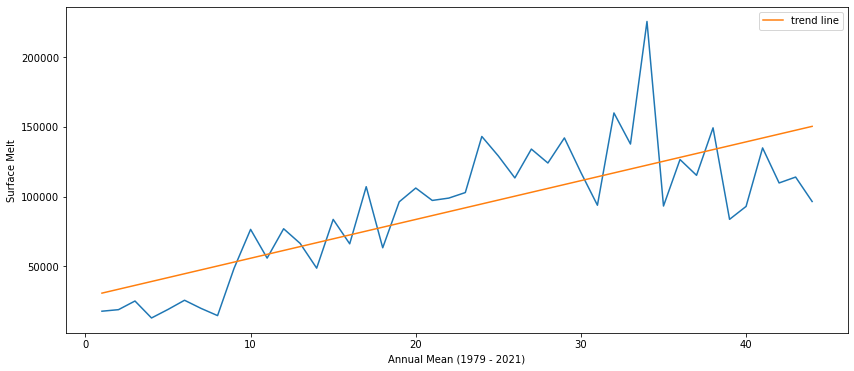

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Annual Mean (1979 - 2021)')
plt.ylabel('Surface Melt')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### GBI Annual Trend Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,45,1)
Y = annual_mean_gbi
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [0.17494219] x +  5282.82696506866
lr confidence:  0.0007184569859841616


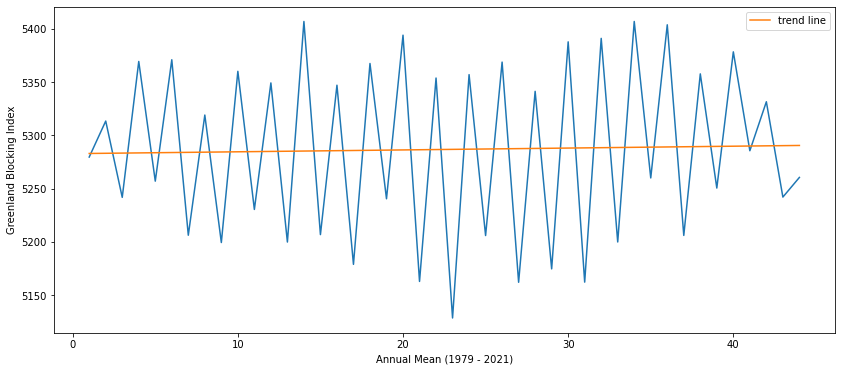

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Annual Mean (1979 - 2021)')
plt.ylabel('Greenland Blocking Index')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

# Old Analysis

In [ ]:
#Plotting just one year of data
import pandas as pd
gbi_daily_2 = gbi_daily[8766:,:]

j = 0
summer_days = gbi_daily_2[151:243,:]
print(summer_days.shape)
for i in range(2003,2018):
  if i % 4 == 0:
    year_data = gbi_daily_2[j:j+366,:]
    summer = year_data[152:244,:]
    summer_days = np.concatenate((summer_days,summer),axis = 0)
    j = j + 366
    #print(summer.shape)
    #print(summer_days.shape)
  else:
    year_data = gbi_daily_2[j:j+365,:]
    summer = year_data[151:243,:]
    summer_days = np.concatenate((summer_days,summer),axis = 0)
    j = j + 365

summer_days = summer_days[92:,:]
print('Last 17 years summer days:',summer_days.shape)

(92, 2)
Last 17 years summer days: (1380, 2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,1381,1)
Y = summer_days[:,-1]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [0.0395558] x +  5267.710064543622
lr confidence:  0.01922233649220828


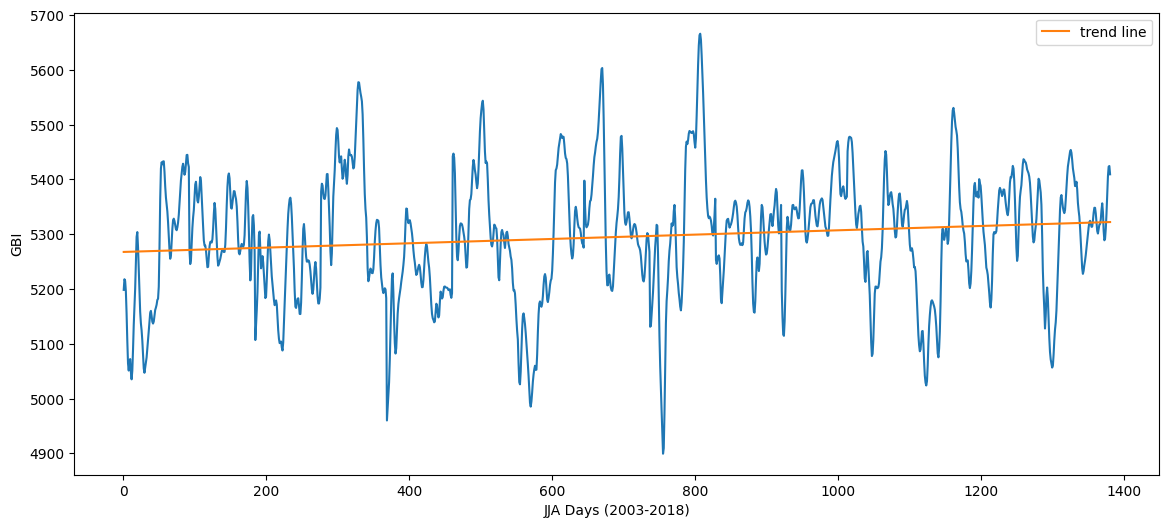

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('JJA Days (2003-2018)')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

## Seasonal Trend Analysis

### JJA Trend for 40 Years' Summer Data

In [ ]:
#Plotting just one year of data
import pandas as pd
gbi_daily = np.array(pd.read_csv('/content/drive/MyDrive/UMBC/iHARP/Data/GBI_daily_1979_2018.csv'))

j = 0
summer_days = gbi_daily[151:243,:]
print(summer_days.shape)
for i in range(1979,2018):
  if i % 4 == 0:
    year_data = gbi_daily[j:j+366,:]
    summer = year_data[152:244,:]
    summer_days = np.concatenate((summer_days,summer),axis = 0)
    j = j + 366
    #print(summer.shape)
    #print(summer_days.shape)
  else:
    year_data = gbi_daily[j:j+365,:]
    summer = year_data[151:243,:]
    summer_days = np.concatenate((summer_days,summer),axis = 0)
    j = j + 365

summer_days = summer_days[92:,:]
print('39 year summer days:',summer_days.shape)

(92, 2)
39 year summer days: (3588, 2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,3589,1)
Y = summer_days[:,-1]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [0.0041766] x +  5274.509333152316
lr confidence:  0.0013545278424172968


Plotting Trend

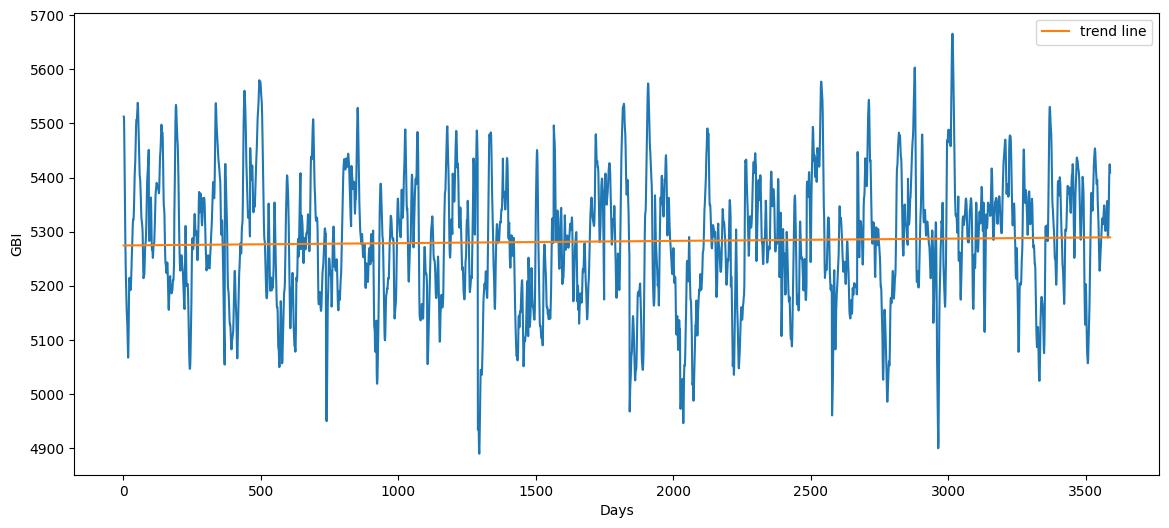

In [ ]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Days')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### Trend for 40-year Averaged data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

gbi_daily_avg = np.array(pd.read_csv('/content/drive/MyDrive/UMBC/iHARP/Data/GBI_daily_mean_1979_2018.csv'))

X = np.arange(1,366,1)
Y = gbi_daily_avg
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [[0.02924839]] x +  [5288.20249493]
lr confidence:  0.033791957037288434


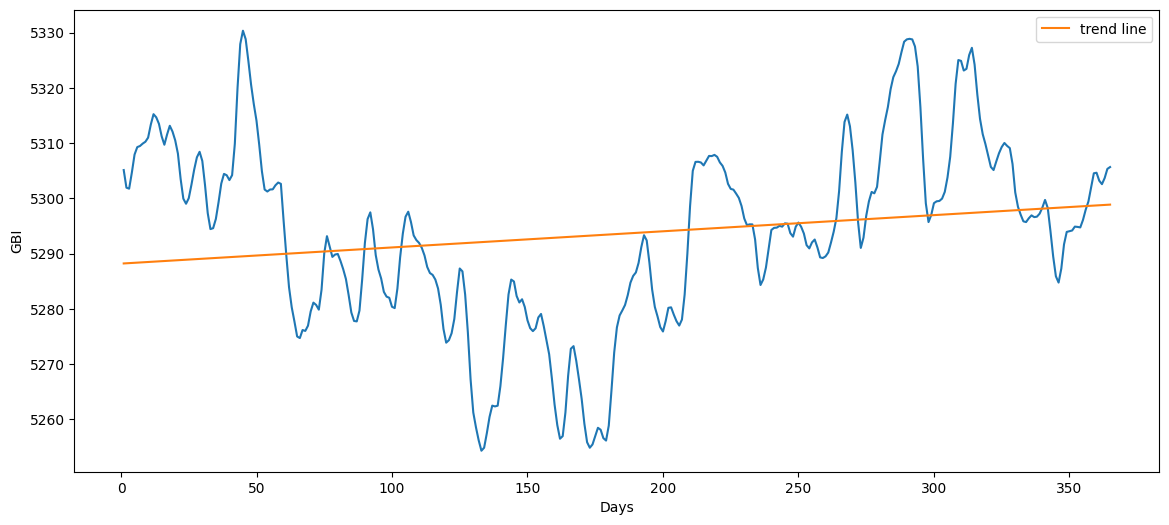

In [ ]:
# To show the relationship of the training set and the predicted prices.. we plot the following.
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Days')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### JJA Trend for 40-years averaged Summer Data


In [ ]:
X = np.arange(1,93,1)
Y = gbi_daily_avg[151:243]
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [[0.45428812]] x +  [5261.76843967]
lr confidence:  0.5735552936465255


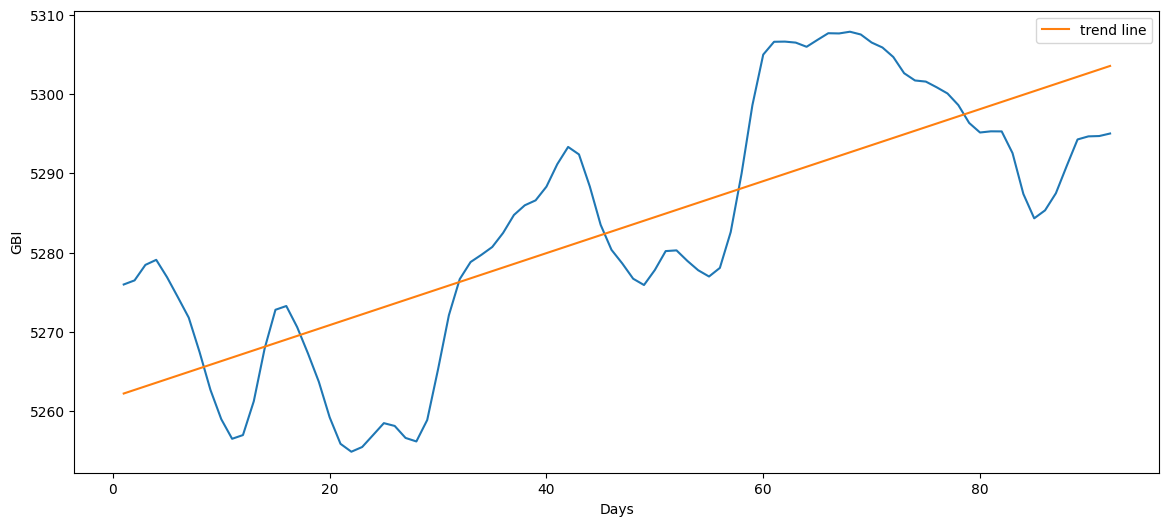

In [ ]:
# To show the relationship of the training set and the predicted prices.. we plot the following.
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Days')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

### Monthly Trend

In [ ]:
import pandas as pd
import numpy as np
monthly_gbi = np.array(pd.read_csv('/content/drive/MyDrive/UMBC/iHARP/Data/Greenland_domain_mean_1979_2021_monthly.csv'))

monthly_gbi = monthly_gbi[:,-1]
print(monthly_gbi.shape)
june_gbi = monthly_gbi[5::12]
july_gbi = monthly_gbi[6::12]
aug_gbi = monthly_gbi[7::12]
print(june_gbi.shape)
print(july_gbi.shape)
print(aug_gbi.shape)
summer_gbi = np.concatenate((june_gbi.reshape(-1,1),july_gbi.reshape(-1,1),aug_gbi.reshape(-1,1)),1)
#print(june_gbi[0],july_gbi[0],aug_gbi[0],summer_gbi[0],summer_gbi[42],summer_gbi[84])
mean_summer = np.mean((summer_gbi),axis=1)
print(mean_summer.shape)
print(summer_gbi.shape)

(504,)
(42,)
(42,)
(42,)
(42,)
(42, 3)


In [ ]:
#Reshape JJA months to reorder them for JJA for every year
summer_gbi_v2 = np.reshape(summer_gbi,126)
print(summer_gbi_v2.shape)
print(june_gbi[0],july_gbi[0],aug_gbi[0],summer_gbi_v2[0],summer_gbi_v2[1],summer_gbi_v2[2])

(126,)
5229.354887566666 5421.2250711612905 5320.1457623225815 5229.354887566666 5421.2250711612905 5320.1457623225815


(504, 5)


Text(0, 0.5, 'Greenland Blocking Index')

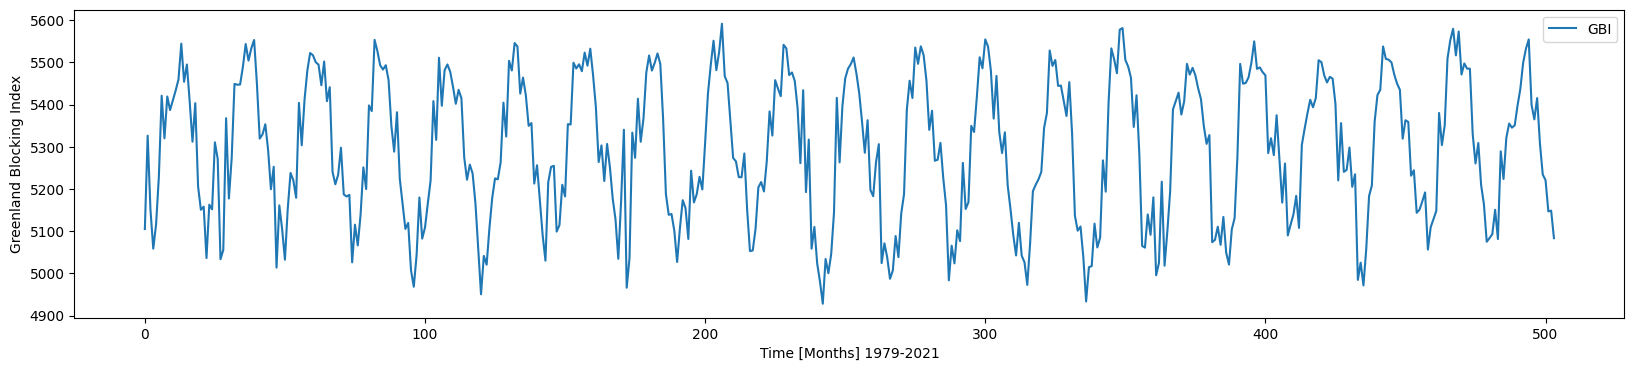

In [ ]:
import pandas as pd
import numpy as np
monthly_gbi = np.array(pd.read_csv('/content/drive/MyDrive/UMBC/iHARP/Data/Greenland_domain_mean_1979_2021_monthly.csv'))
print(monthly_gbi.shape)
import matplotlib.pyplot as plt
import datetime

fig,ax = plt.subplots(figsize = [20,4])
ax.plot(range(504),monthly_gbi[:,-1], label = "GBI")
ax.legend()
ax.set_xlabel("Time [Months] 1979-2021")
ax.set_ylabel(r"Greenland Blocking Index")

Text(0, 0.5, 'Mean JJA Greenland Blocking Index')

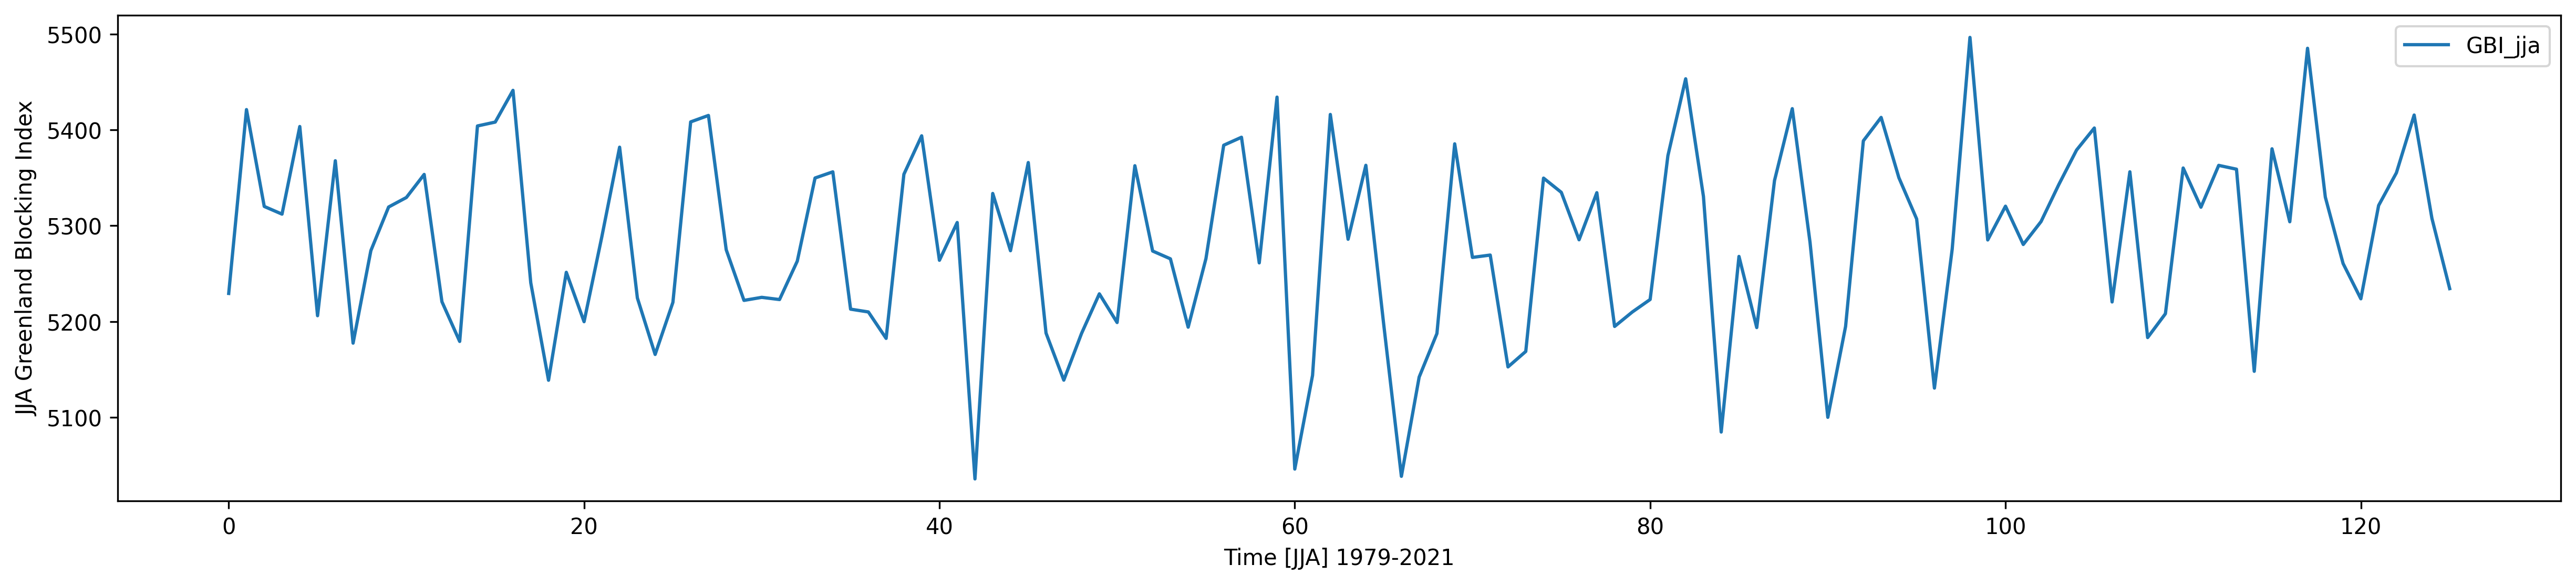

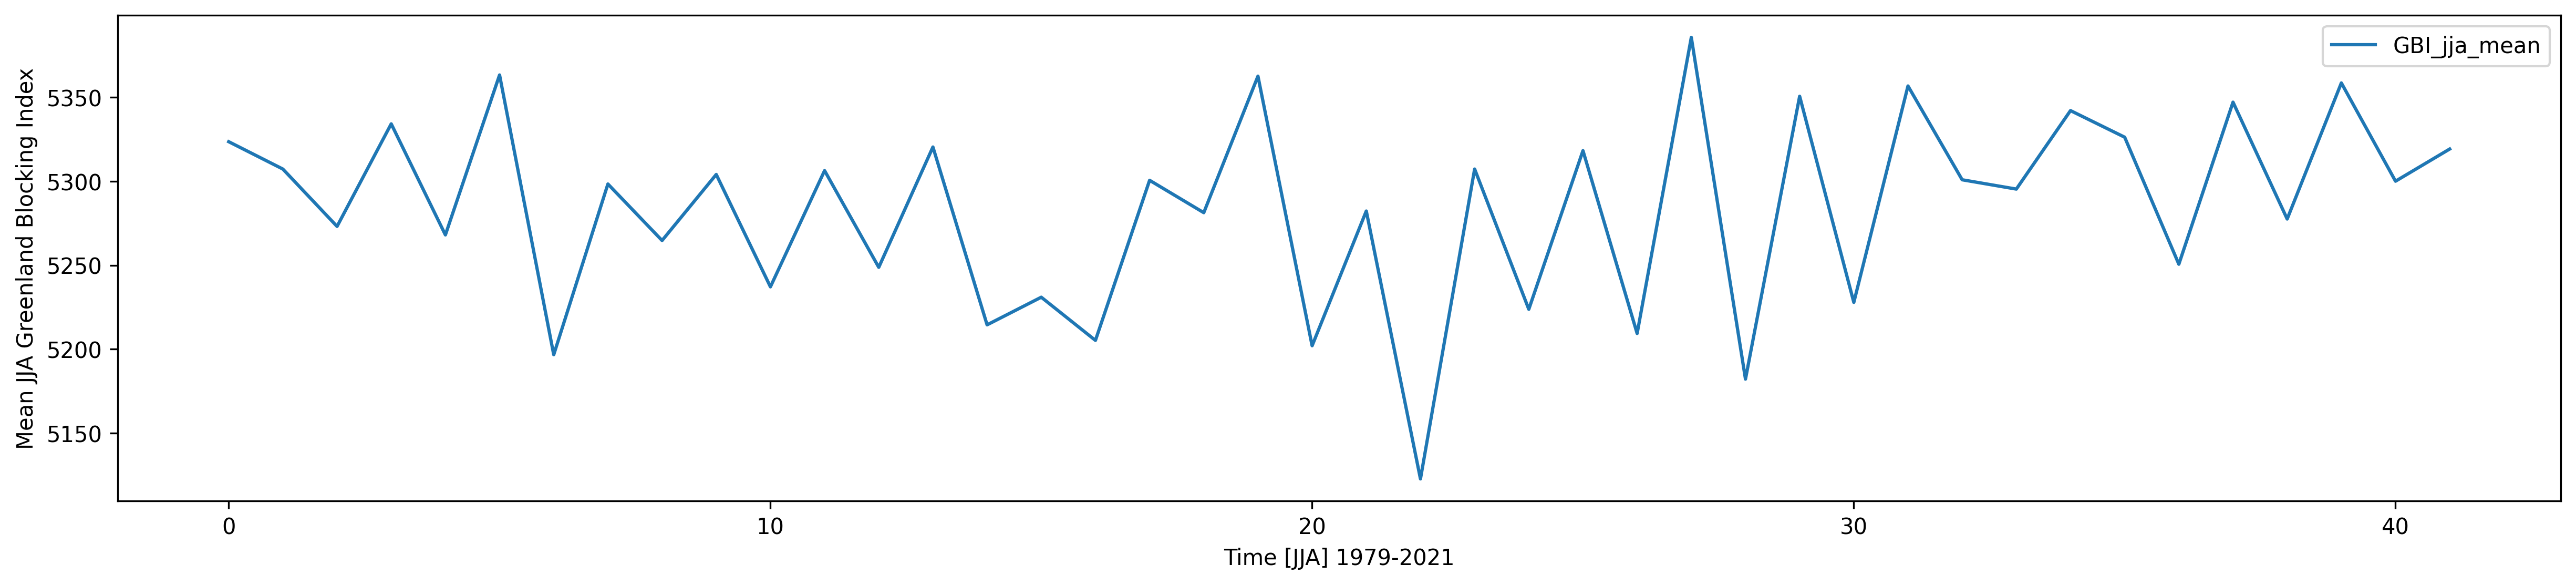

In [ ]:
import matplotlib.pyplot as plt
import datetime

fig,ax = plt.subplots(figsize = [20,4], dpi = 300)
ax.plot(range(126),summer_gbi_v2, label = "GBI_jja")
#ax.plot(range(42),mean_summer, label = "GBI_jja_mean")
ax.legend()
ax.set_xlabel("Time [JJA] 1979-2021")
ax.set_ylabel(r"JJA Greenland Blocking Index")

import matplotlib.pyplot as plt
import datetime

fig,ax = plt.subplots(figsize = [20,4], dpi = 300)
#ax.plot(range(126),summer_gbi_v2, label = "GBI_jja")
ax.plot(range(42),mean_summer, label = "GBI_jja_mean")
ax.legend()
ax.set_xlabel("Time [JJA] 1979-2021")
ax.set_ylabel(r"Mean JJA Greenland Blocking Index")

### GBI Summer Trend Analysis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.arange(1,43,1)
Y = mean_summer.reshape(-1,1)
lr = LinearRegression()
fit = lr.fit(X.reshape(-1, 1), Y)

## coefficients of linear fit are:
b = fit.intercept_
m = fit.coef_

print("the equation of the linear fit is: ")
print('y= ', m, 'x + ', b)

# checking R^2
R_sqd = lr.score(X.reshape(-1, 1), Y.reshape(-1, 1))
print("lr confidence: ", R_sqd)

the equation of the linear fit is: 
y=  [[0.65656418]] x +  [5269.86601066]
lr confidence:  0.01892401883966277


Plotting the Trend

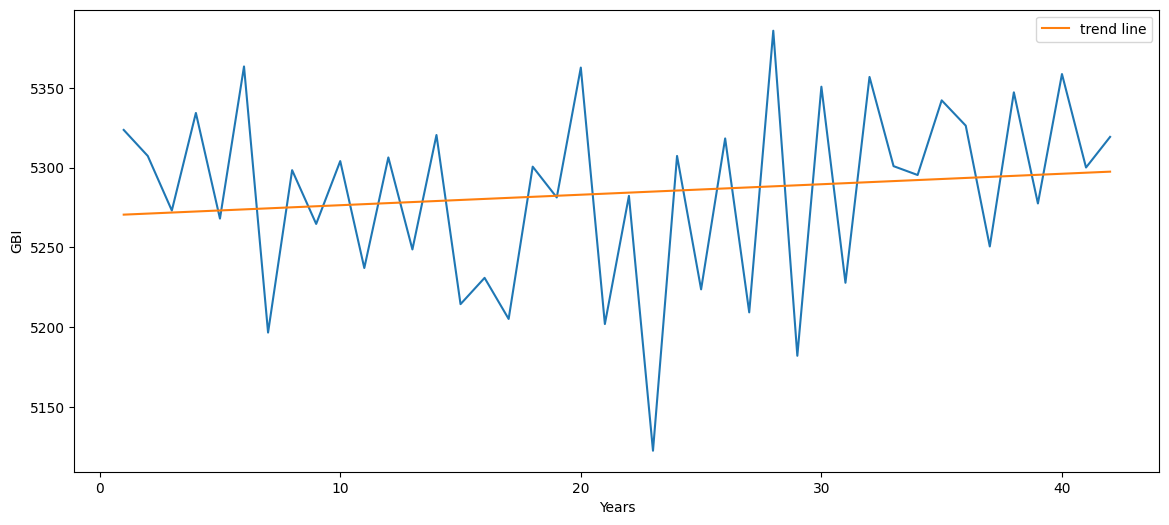

In [ ]:
# To show the relationship of the training set and the predicted prices.. we plot the following.
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(X, Y)
plt.xlabel('Years')
plt.ylabel('GBI')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='trend line')
plt.legend()

In [ ]:
print(summer_gbi_v2.shape)
print(mean_summer.shape)

mean_summer_2018 = mean_summer[:-3]
print(mean_summer_2018.shape)

mean_summer_gbi_2018 = summer_gbi_v2[:-9]
print(mean_summer_gbi_2018.shape)

jja_avg_mean = np.mean(mean_summer_2018)
jja_avg_min = np.min(mean_summer_2018)
jja_avg_max = np.max(mean_summer_2018)
jja_avg_std = np.std(mean_summer_2018)

jja_mean = np.mean(mean_summer_gbi_2018)
jja_min = np.min(mean_summer_gbi_2018)
jja_max = np.max(mean_summer_gbi_2018)
jja_std = np.std(mean_summer_gbi_2018)

print(jja_mean)
print(jja_min)
print(jja_max)
print(jja_std)

print(jja_avg_mean)
print(jja_avg_min)
print(jja_avg_max)
print(jja_avg_std)

(126,)
(42,)
(39,)
(117,)
5280.75429031509
5035.758178433333
5496.576857548387
96.66297057484627
5280.754290315092
5122.671893044087
5385.706225360214
58.41713218171592


### GBI Winter Trend Analysis

In [ ]:
import pandas as pd
import numpy as np
monthly_gbi = np.array(pd.read_csv('/content/drive/MyDrive/UMBC/iHARP/Data/Greenland_domain_mean_1979_2021_monthly.csv'))

monthly_gbi = monthly_gbi[:,-1]
print(monthly_gbi.shape)
jan_gbi = monthly_gbi[0::12]
feb_gbi = monthly_gbi[1::12]
dec_gbi = monthly_gbi[11::12]

print(dec_gbi.shape)
print(jan_gbi.shape)
print(feb_gbi.shape)

#dec_gbi = dec_gbi[:-1]

#winter_gbi = np.concatenate((dec_gbi.reshape(-1,1),jan_gbi.reshape(-1,1),feb_gbi.reshape(-1,1)),1)
winter_gbi = np.concatenate((jan_gbi.reshape(-1,1),feb_gbi.reshape(-1,1),dec_gbi.reshape(-1,1)),1)

mean_winter = np.mean((winter_gbi),axis=1)
print(mean_winter.shape)
print(winter_gbi.shape)

#Reshape DJF months to reorder them for DFJ for every year
winter_gbi = np.reshape(winter_gbi,126)
print(winter_gbi.shape)
#print(dec_gbi[0],jan_gbi[0],feb_gbi[0],winter_gbi[0],winter_gbi[1],winter_gbi[2])
print(jan_gbi[0],feb_gbi[0],dec_gbi[0],winter_gbi[0],winter_gbi[1],winter_gbi[2])

(504,)
(42,)
(42,)
(42,)
(42,)
(42, 3)
(126,)
5105.075605096775 5326.400299535715 5433.578738064517 5105.075605096775 5326.400299535715 5433.578738064517


In [ ]:
print(dec_gbi[0:5],jan_gbi[0:5],feb_gbi[0:5])

print(winter_gbi[:10])

[5433.57873806 5162.84223687 5489.8871201  5013.62769794 5522.47316145] [5105.0756051  5459.76117452 5151.81580729 5543.74924984 5161.21971755] [5326.40029954 5544.59389341 5310.66737504 5504.32855075 5104.87961975]
[5105.0756051  5326.40029954 5433.57873806 5459.76117452 5544.59389341
 5162.84223687 5151.81580729 5310.66737504 5489.8871201  5543.74924984]


Text(0, 0.5, 'Mean JFD Greenland Blocking Index')

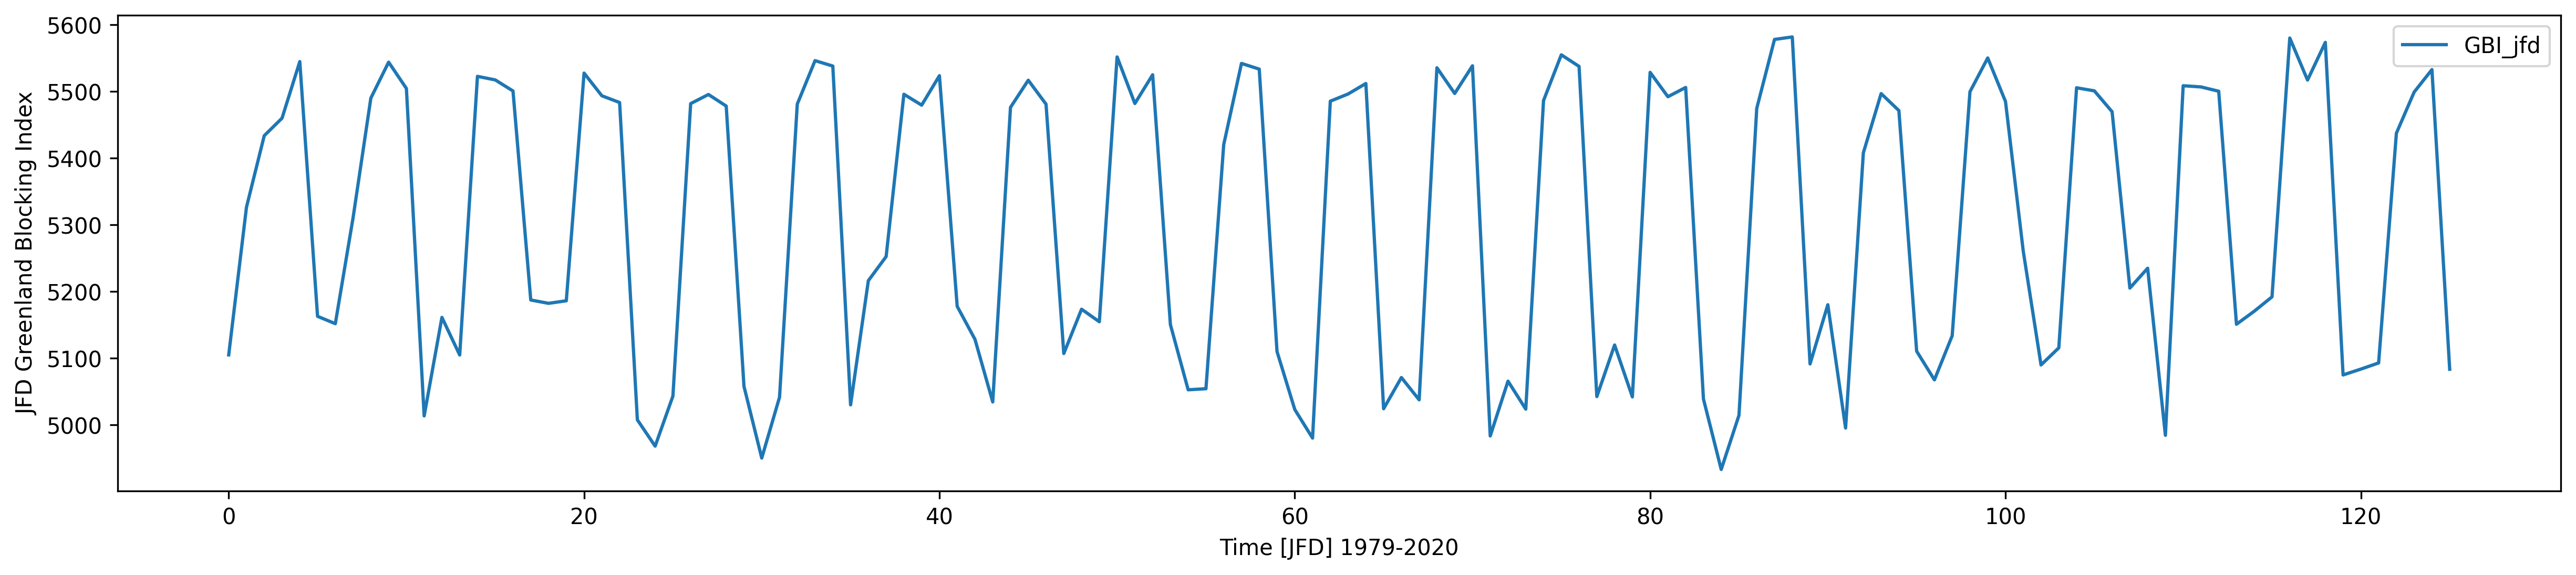

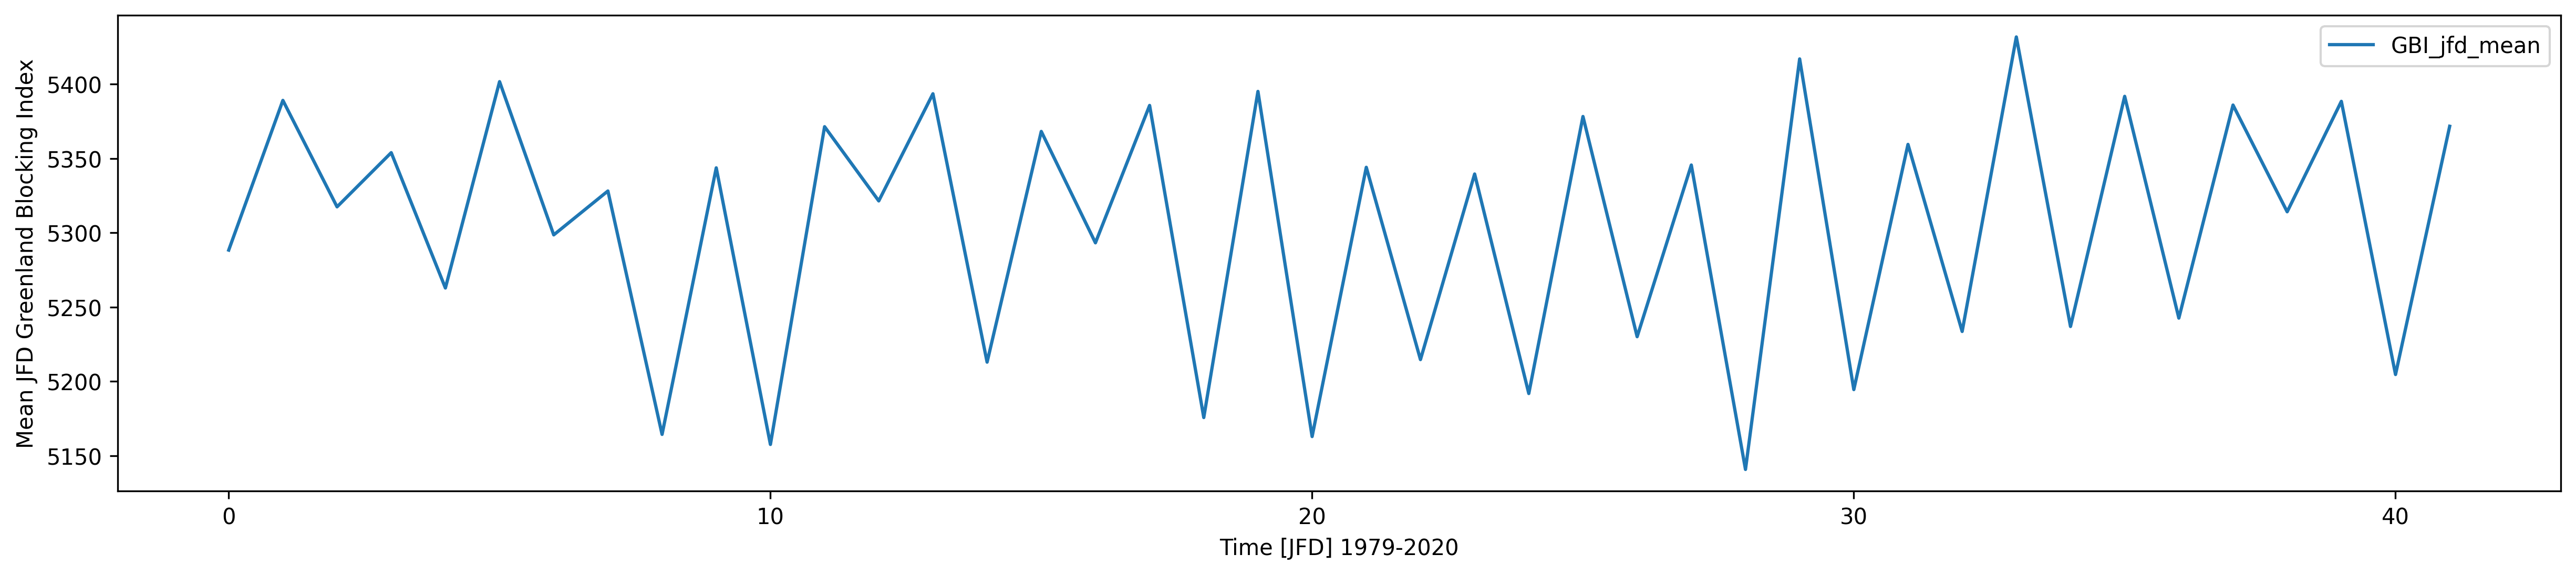

In [ ]:
import matplotlib.pyplot as plt
import datetime

fig,ax = plt.subplots(figsize = [20,4], dpi = 300)
ax.plot(range(126),winter_gbi, label = "GBI_jfd")
ax.legend()
ax.set_xlabel("Time [JFD] 1979-2020")
ax.set_ylabel(r"JFD Greenland Blocking Index")

import matplotlib.pyplot as plt
import datetime

fig,ax = plt.subplots(figsize = [20,4], dpi = 300)
ax.plot(range(42),mean_winter, label = "GBI_jfd_mean")
ax.legend()
ax.set_xlabel("Time [JFD] 1979-2020")
ax.set_ylabel(r"Mean JFD Greenland Blocking Index")

## Greenland Melt Extent Dataset

In [ ]:
import numpy as np
import pandas as pd

melt_data = np.load("/content/RunningAvg-Melt-extent-1979-2022.npy")

In [ ]:
melt_data.shape

(9240,)

In [ ]:
dict={'melt_extent_avg':melt_data}
data=pd.DataFrame(dict)
data.to_csv('/content/Melt_extent_running_avg_1979_2022.csv',header=True,index=False)